# Kaggle House Prices Project

## 1. Data Preparation

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import featuretools as ft
import woodwork as ww
from autofeat import AutoFeatRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
# Load Data

df = pd.read_csv('data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Check no. of rows, no. of cols
df.shape

(1460, 81)

In [6]:
# Check Metadata

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## EDA and Preprocessing

### Drop Duplicated Columns

In [7]:
# Drop duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# Check to ensure duplicates are dropped
print("Columns after dropping duplicates:")
print(df.columns)


Columns after dropping duplicates:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual

### Convert Data Types

In [8]:
# Convert date-related columns to datetime format
df['YrSold'] = pd.to_datetime(df['YrSold'], format='%Y')
df['MoSold'] = pd.to_datetime(df['MoSold'], format='%m')


### Summary Statistics

In [9]:
# Display Summary Statistics
df.describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
Id,1460.0,730.5,1.0,365.75,730.5,1095.25,1460.0,421.61
MSSubClass,1460.0,56.9,20.0,20.0,50.0,70.0,190.0,42.3
LotFrontage,1201.0,70.05,21.0,59.0,69.0,80.0,313.0,24.28
LotArea,1460.0,10516.83,1300.0,7553.5,9478.5,11601.5,215245.0,9981.26
OverallQual,1460.0,6.1,1.0,5.0,6.0,7.0,10.0,1.38
OverallCond,1460.0,5.58,1.0,5.0,5.0,6.0,9.0,1.11
YearBuilt,1460.0,1971.27,1872.0,1954.0,1973.0,2000.0,2010.0,30.2
YearRemodAdd,1460.0,1984.87,1950.0,1967.0,1994.0,2004.0,2010.0,20.65
MasVnrArea,1452.0,103.69,0.0,0.0,0.0,166.0,1600.0,181.07
BsmtFinSF1,1460.0,443.64,0.0,0.0,383.5,712.25,5644.0,456.1


### Observe Distributions in Categorical Variables

In [10]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


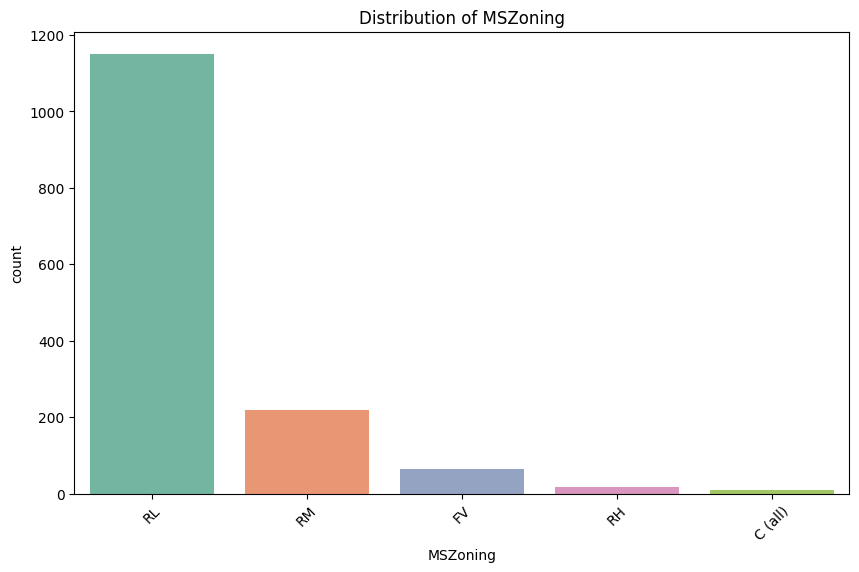

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


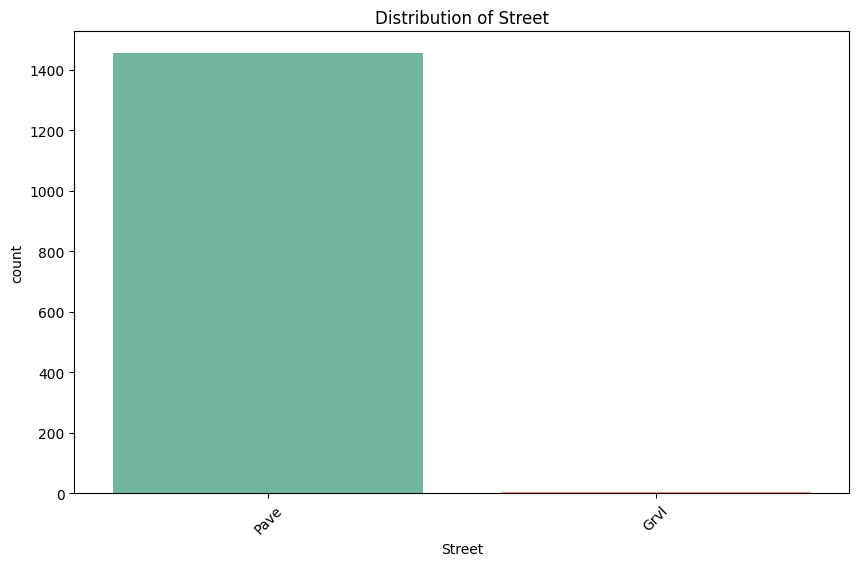

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


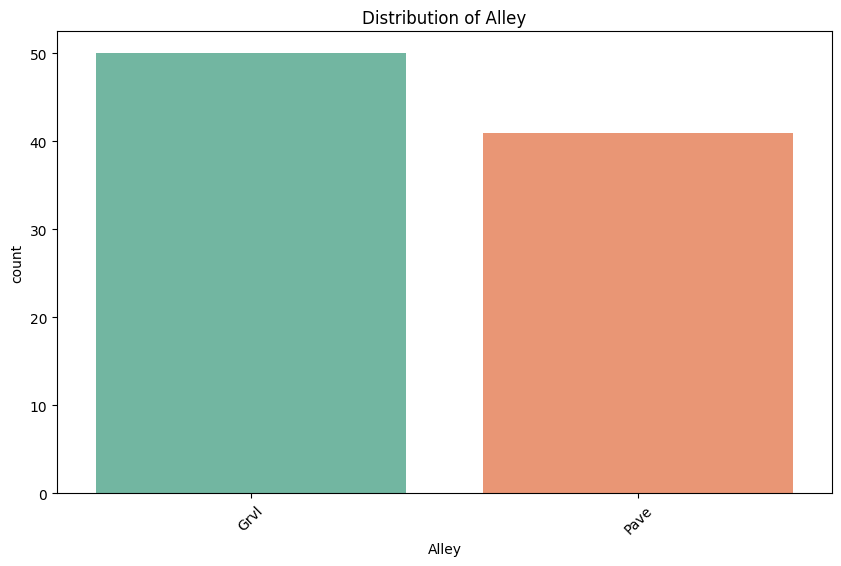

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


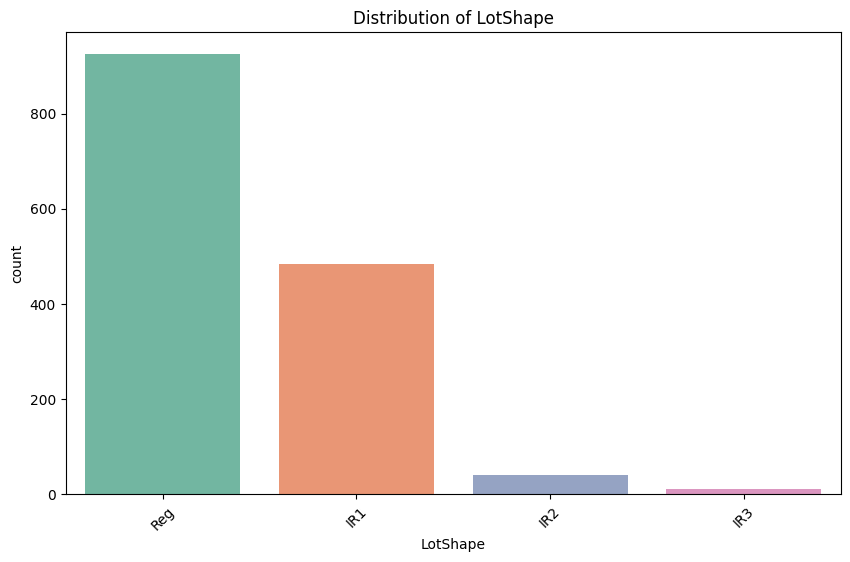

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


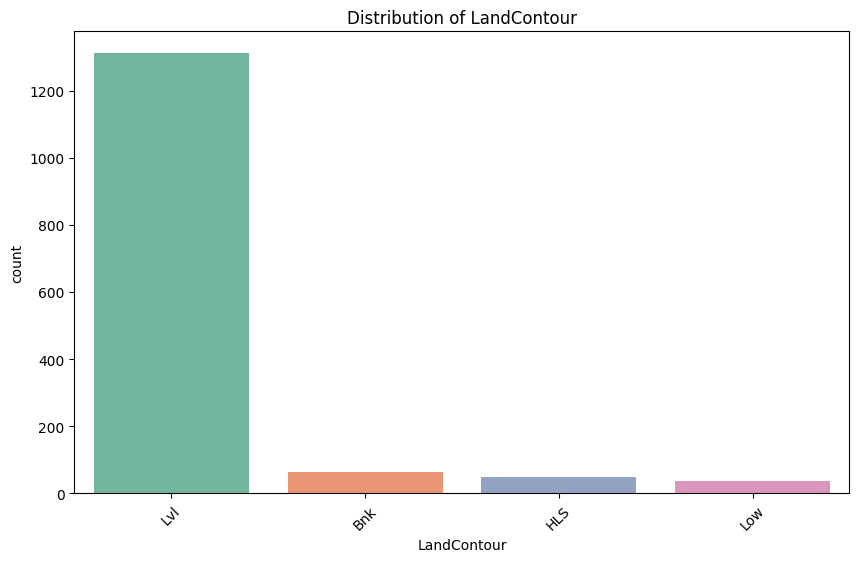

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


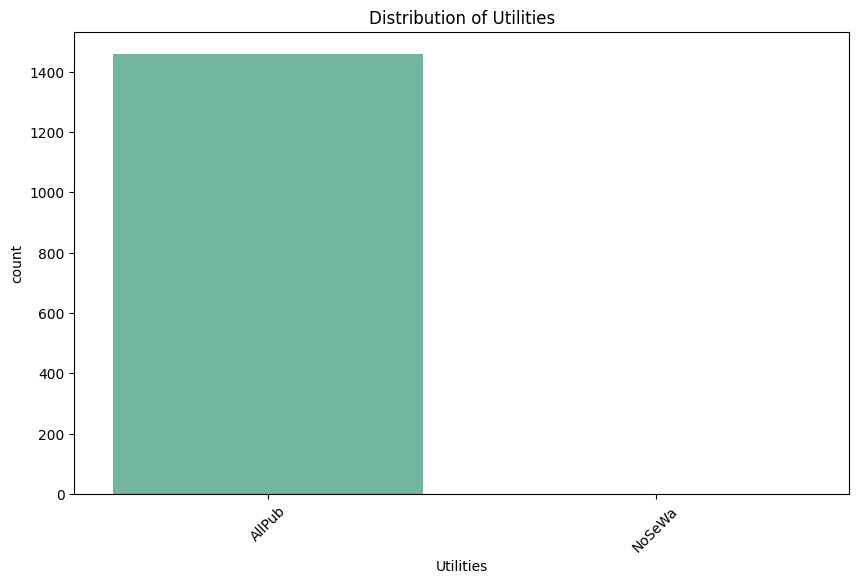

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


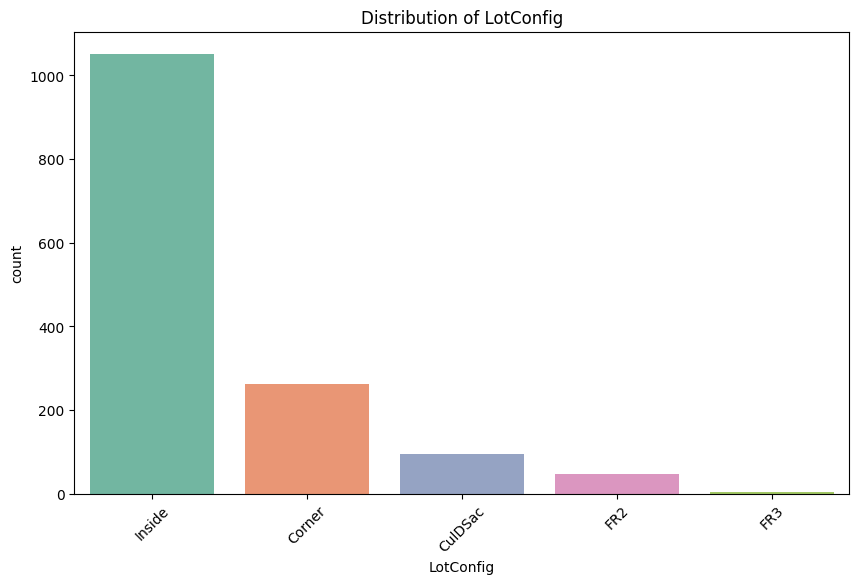

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


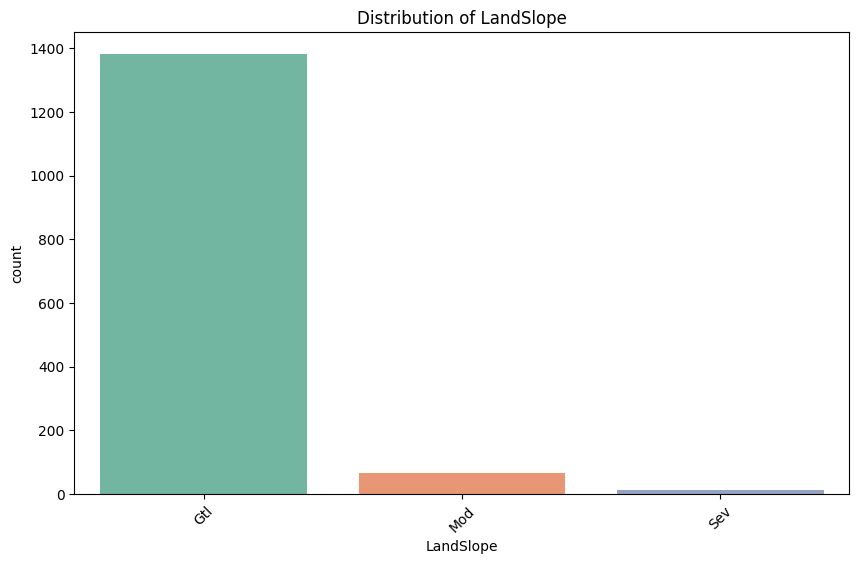

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


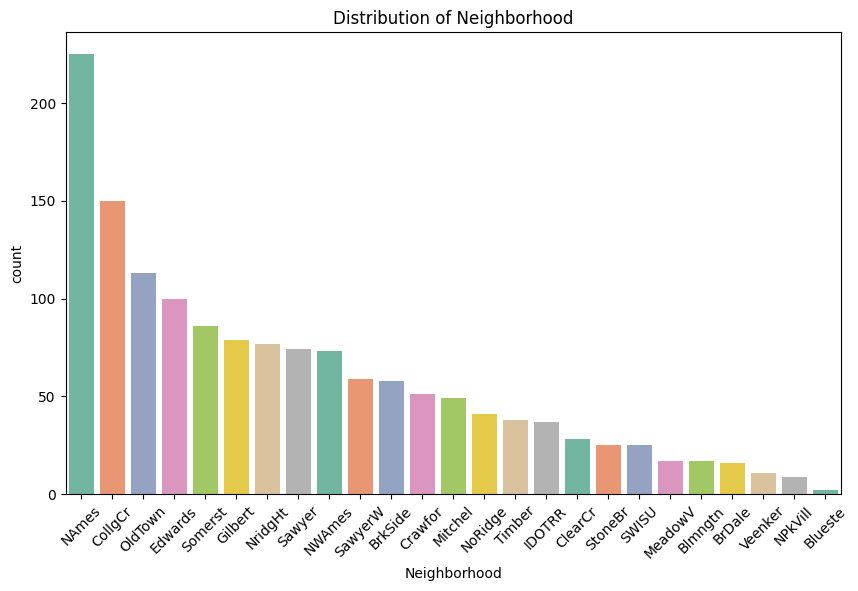

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


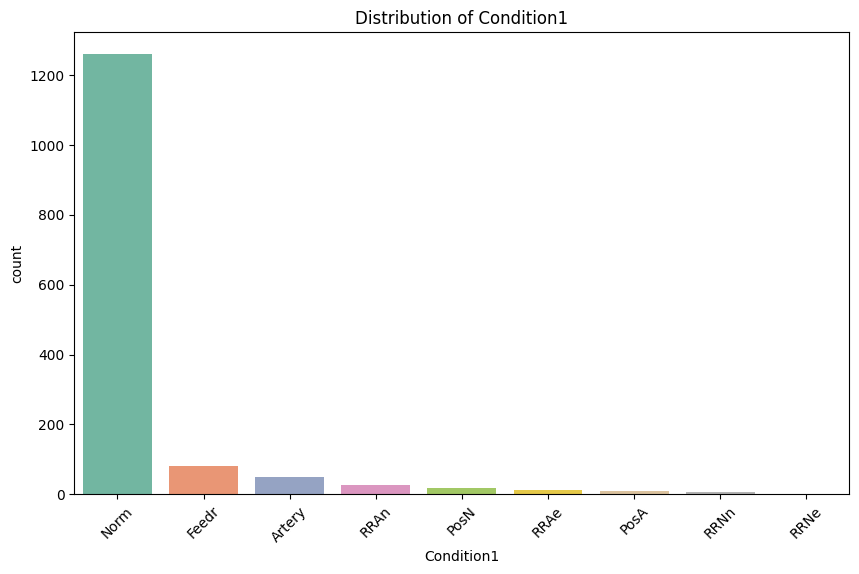

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


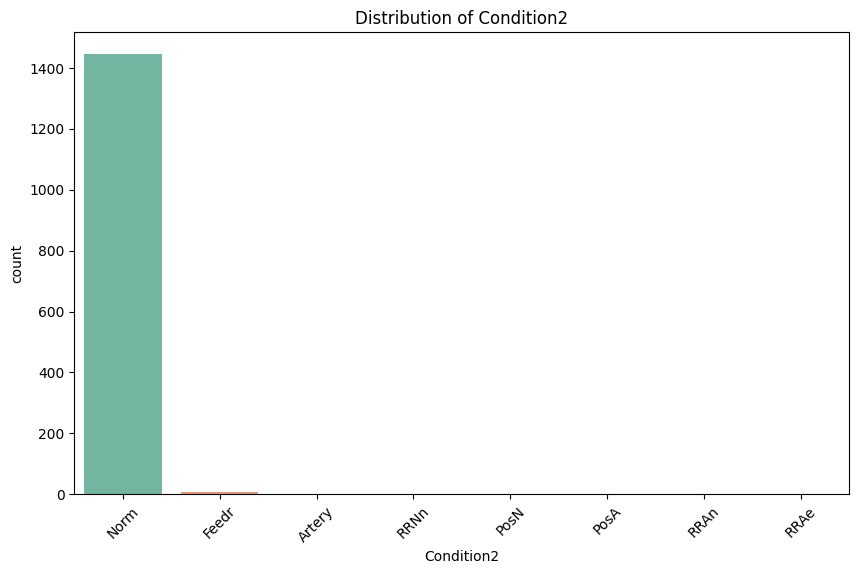

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


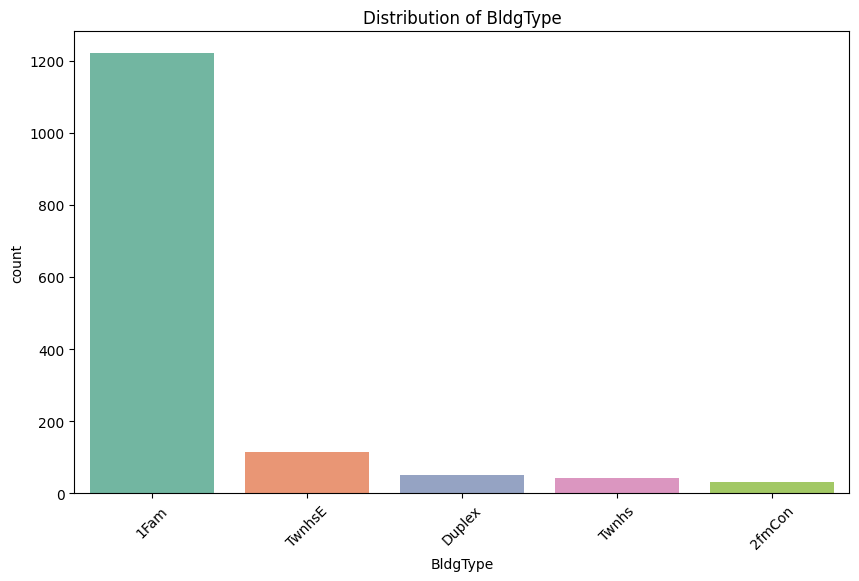

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


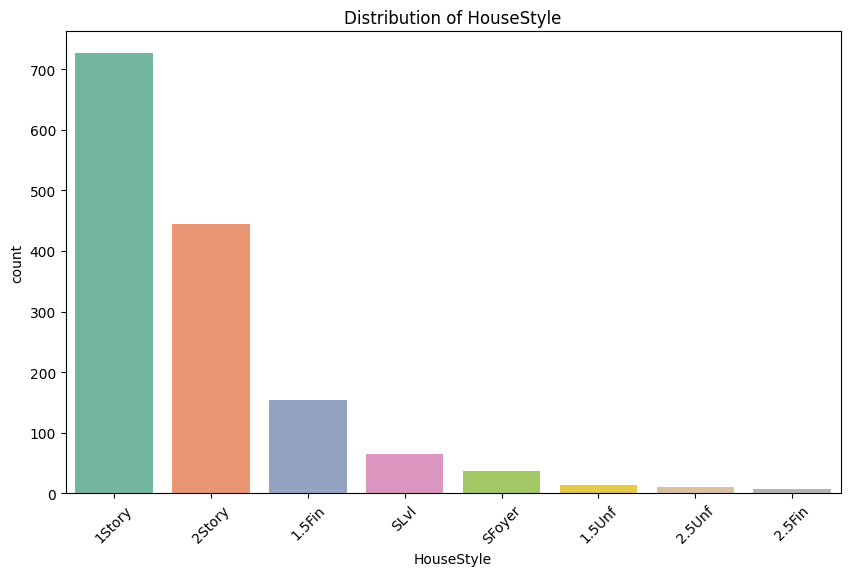

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


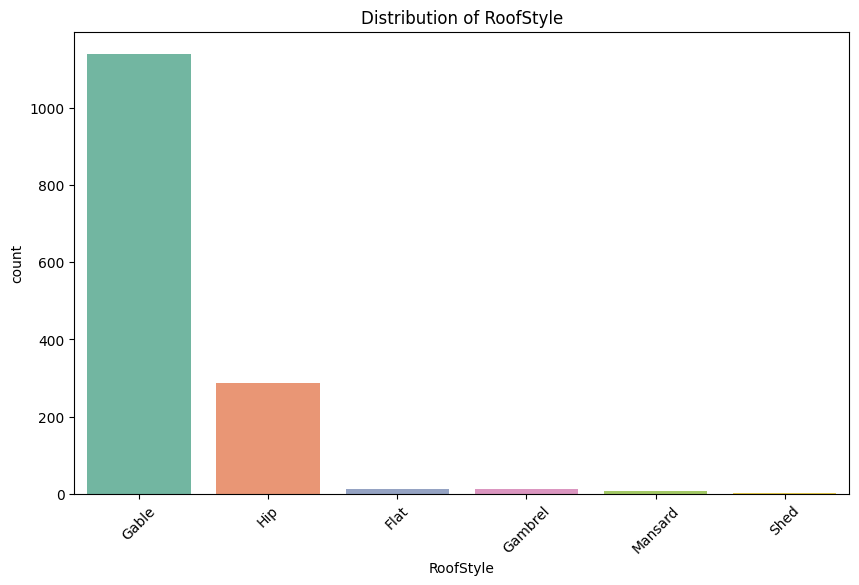

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


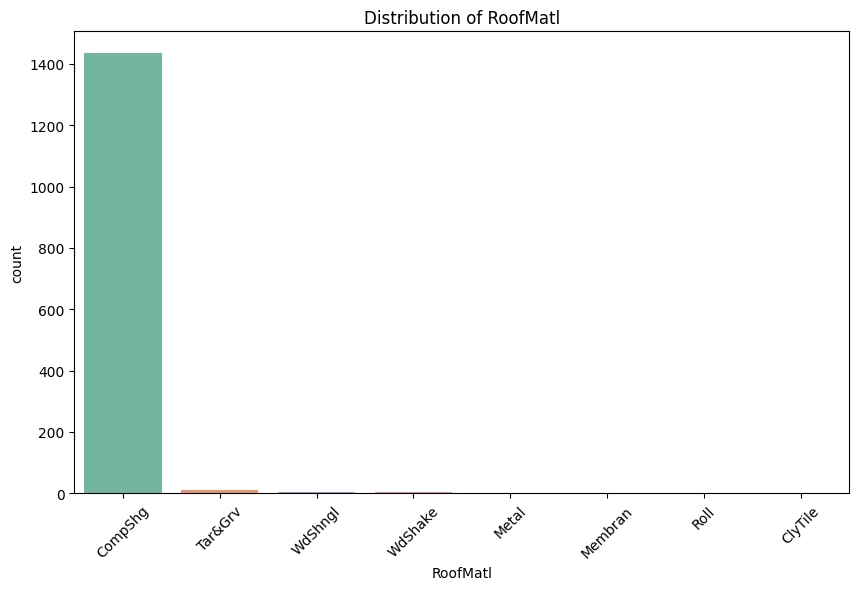

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


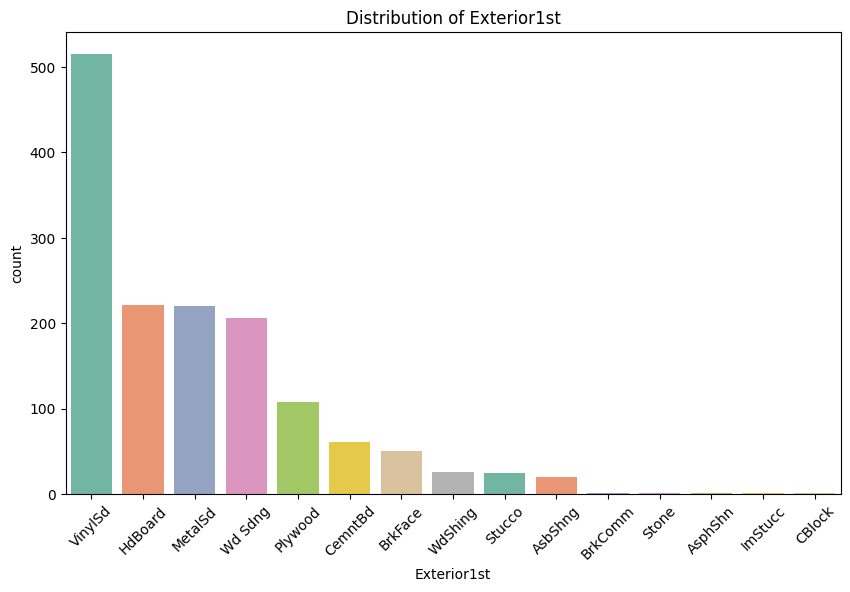

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


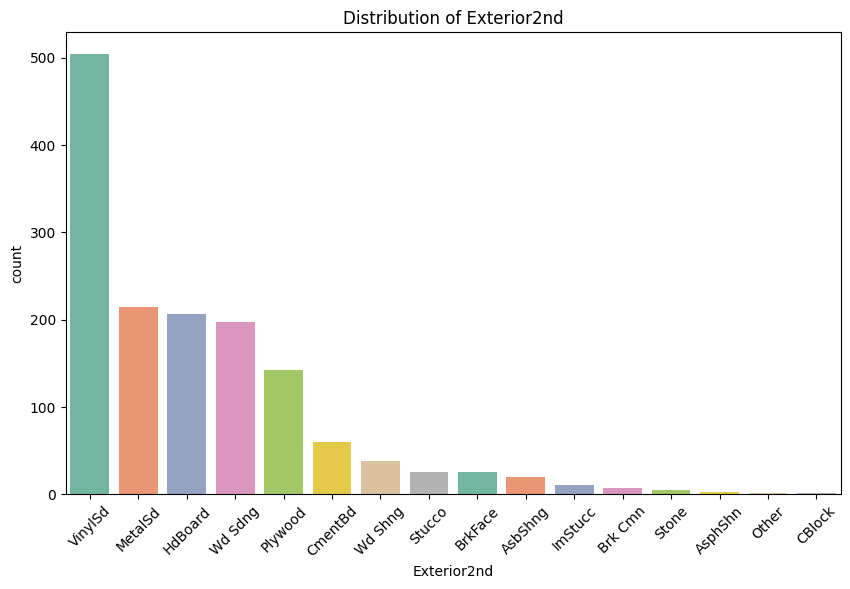

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


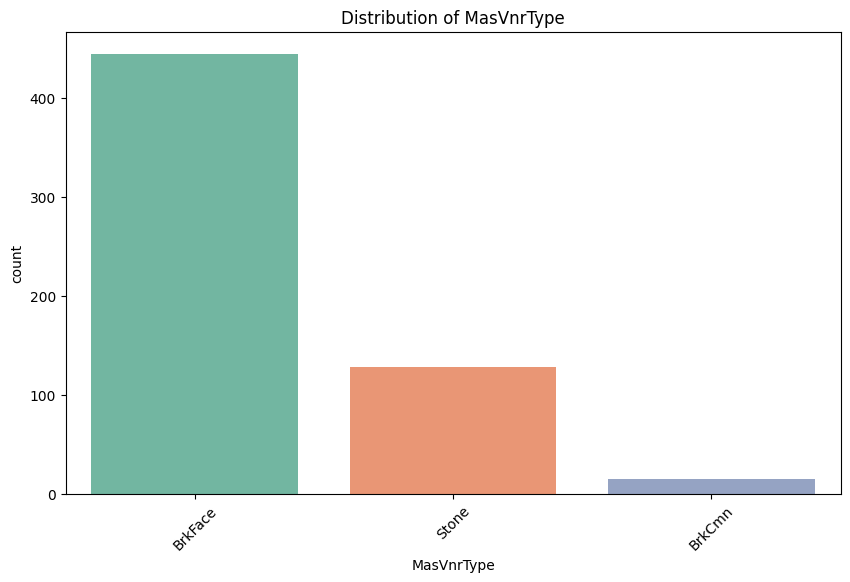

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


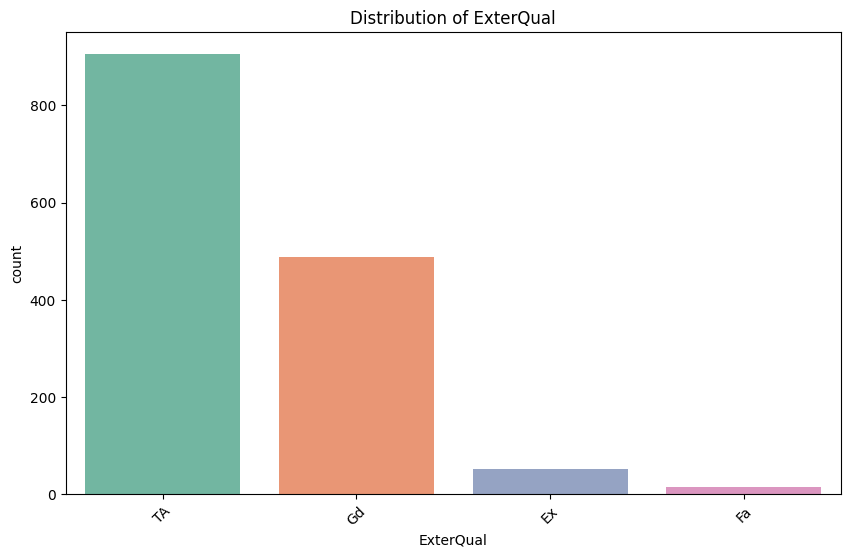

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


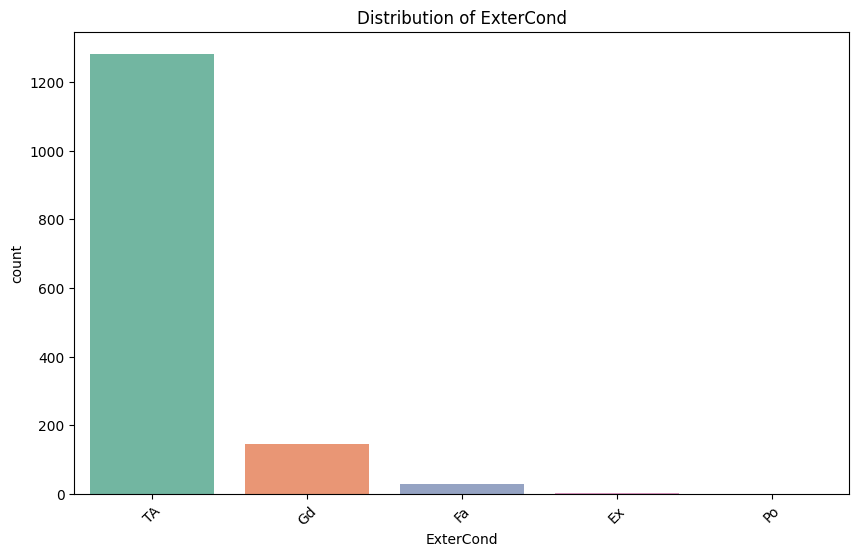

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


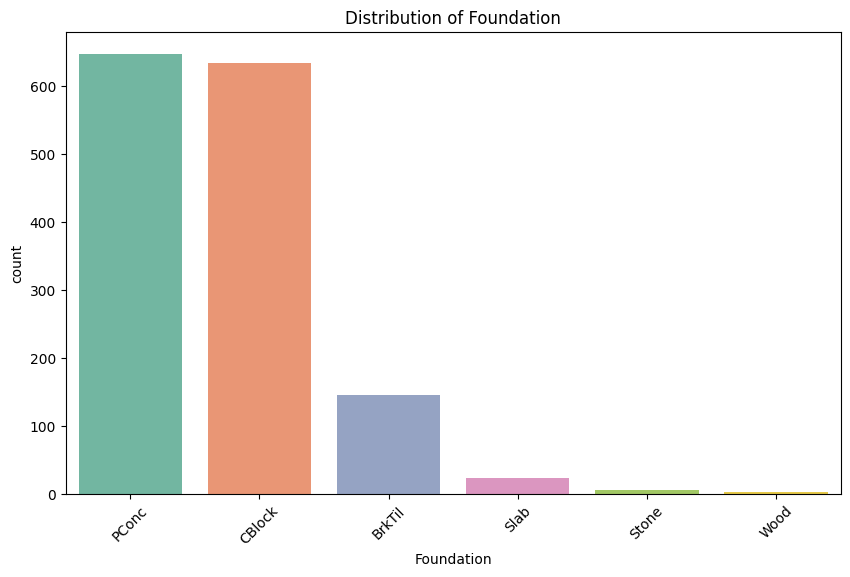

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


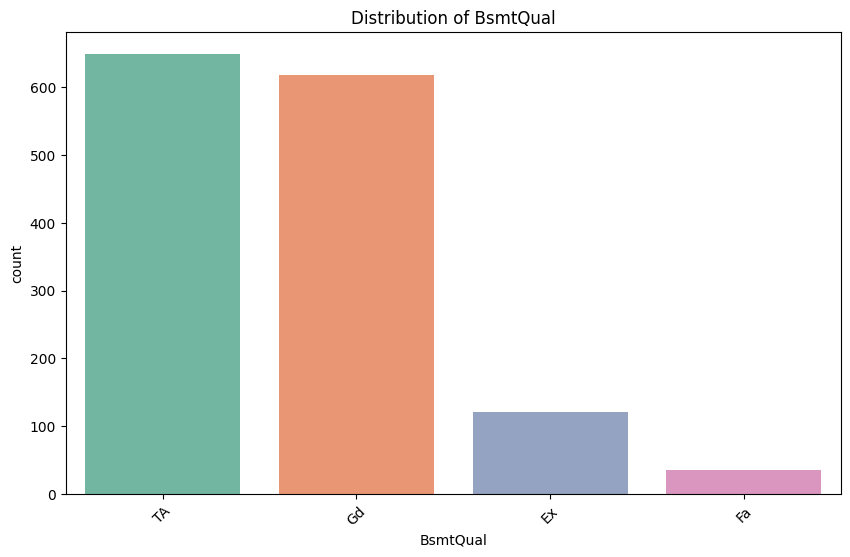

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


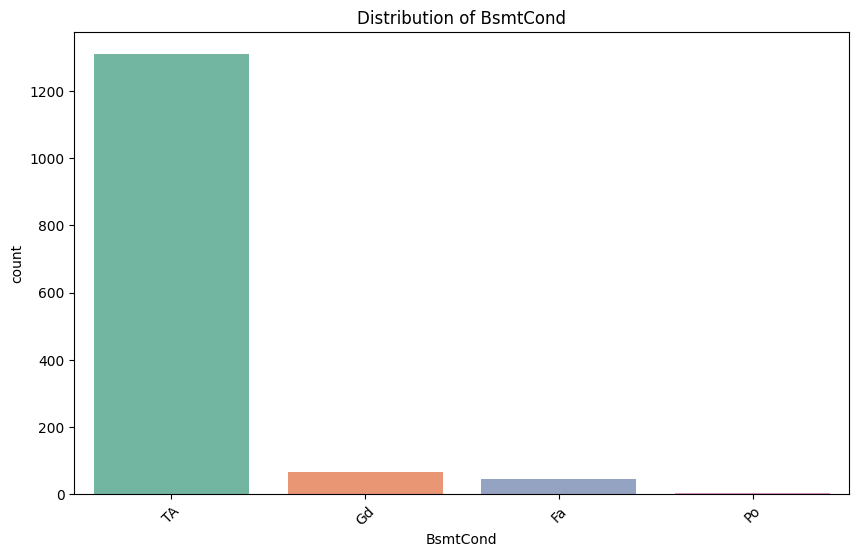

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


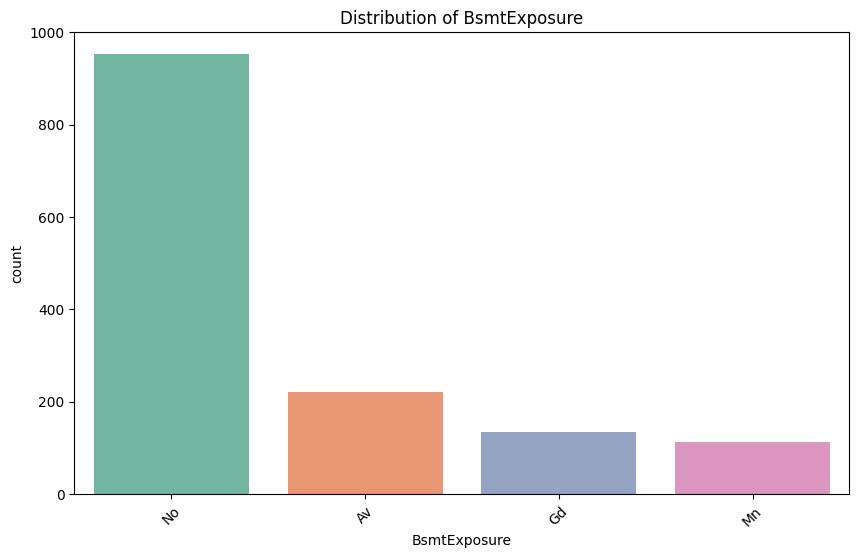

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


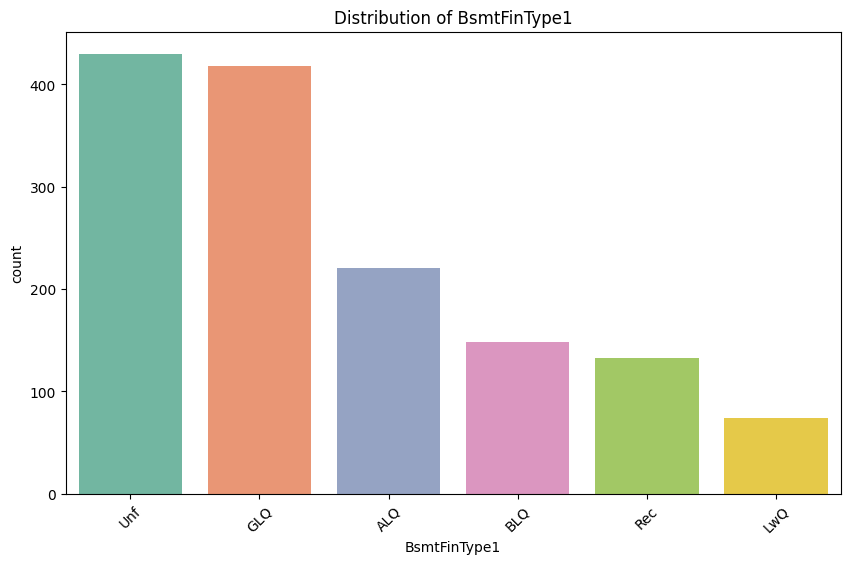

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


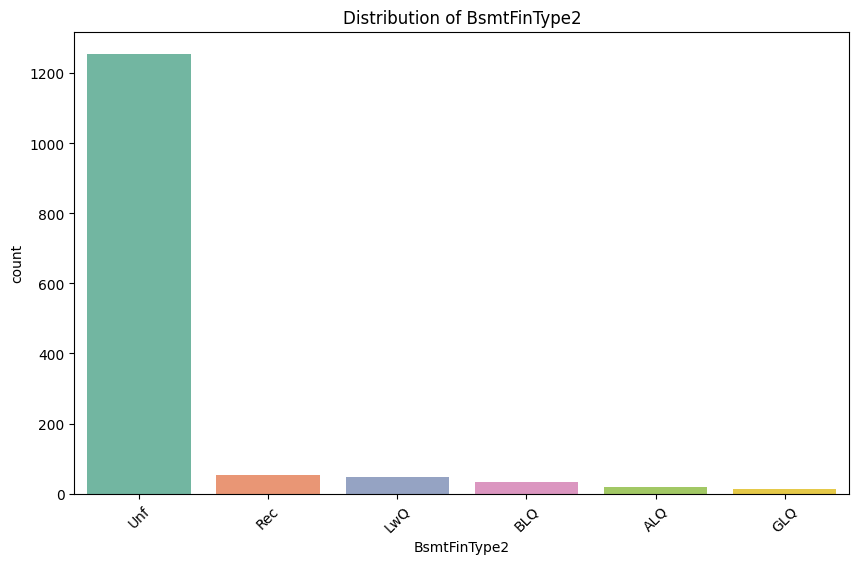

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


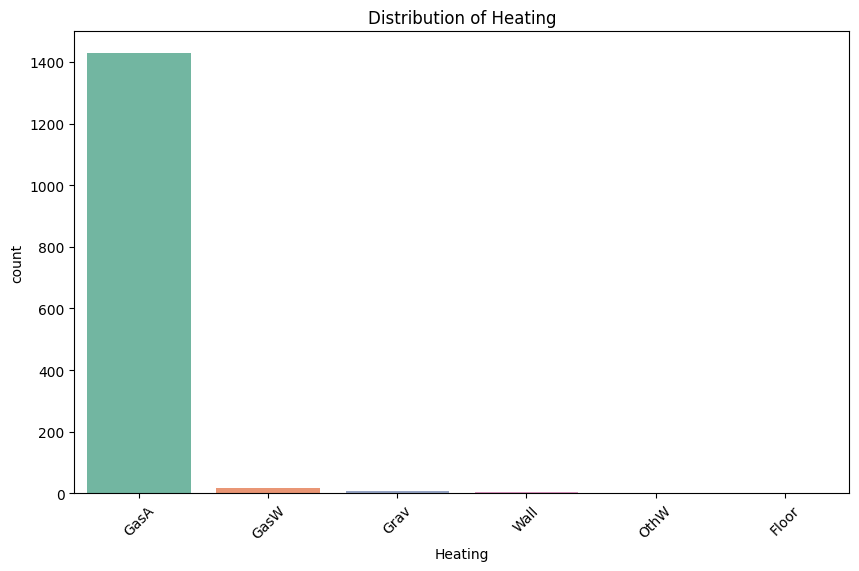

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


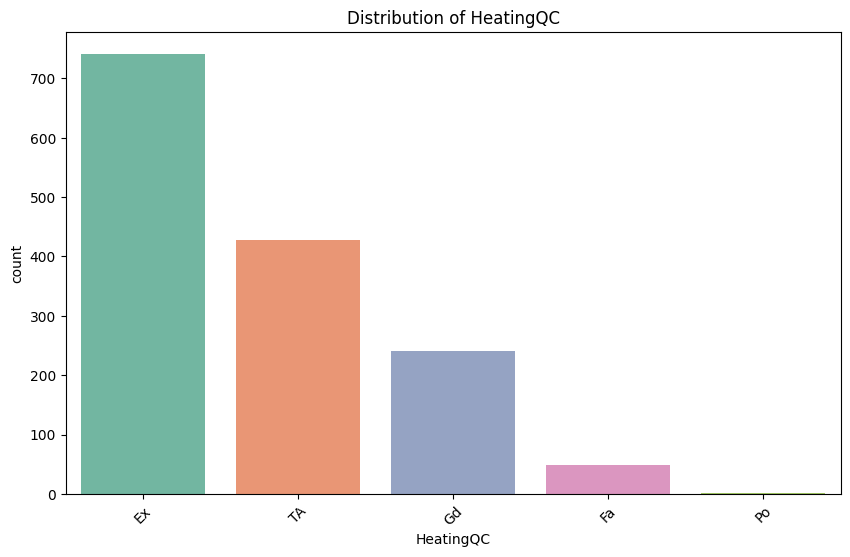

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


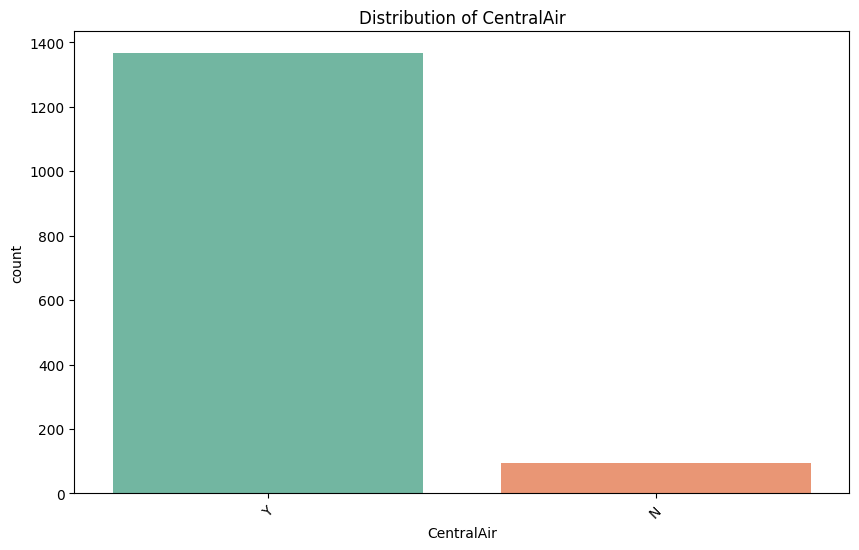

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


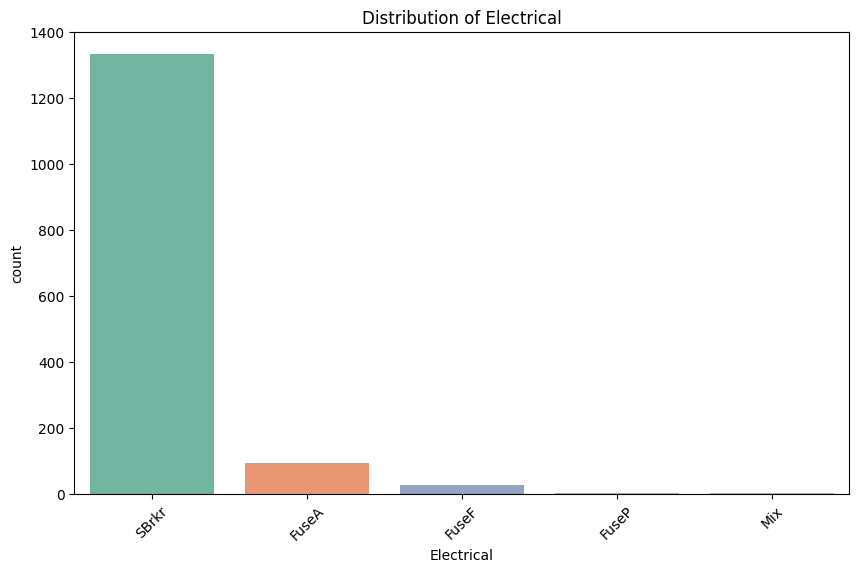

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


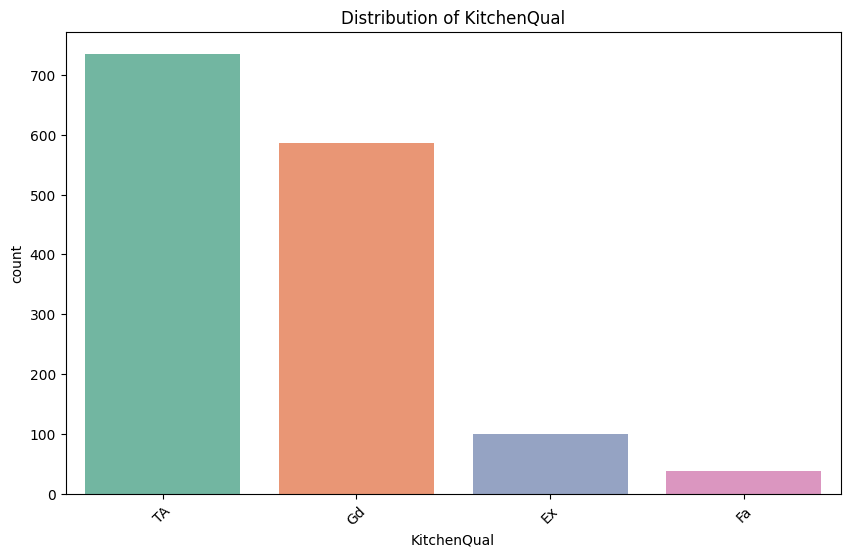

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


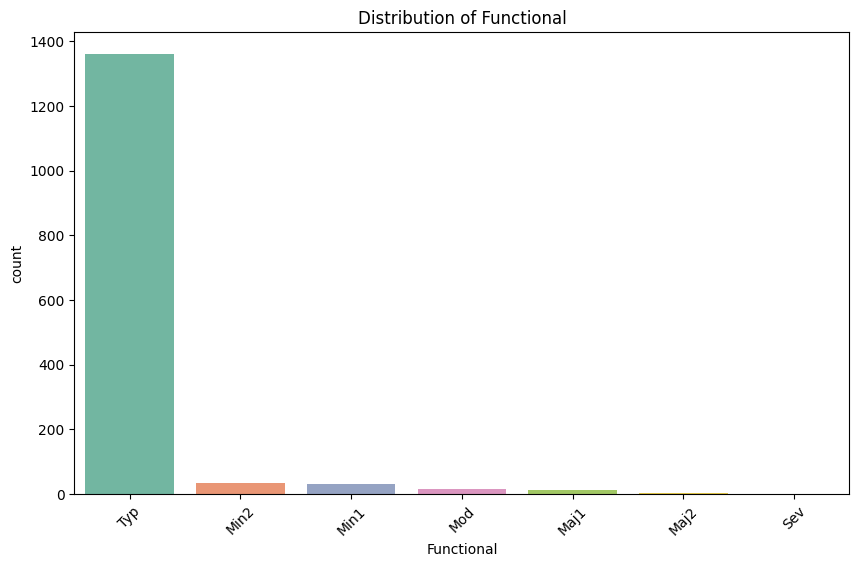

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


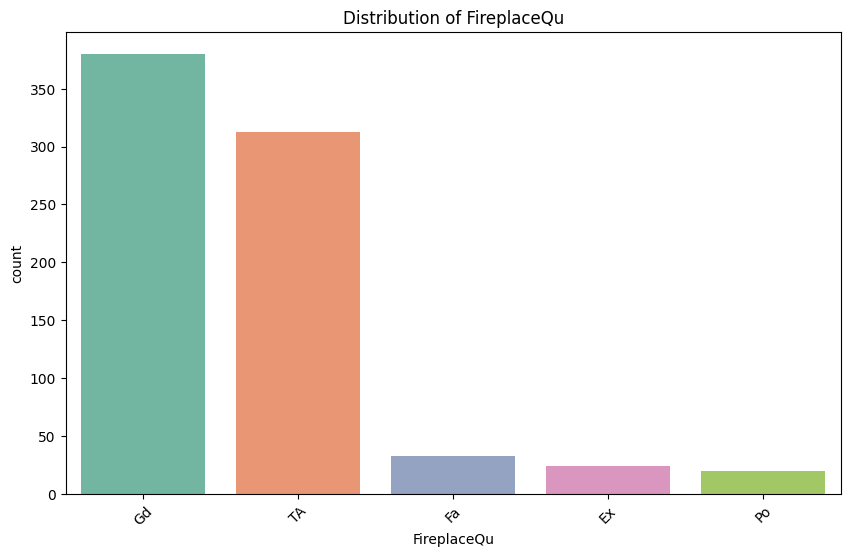

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


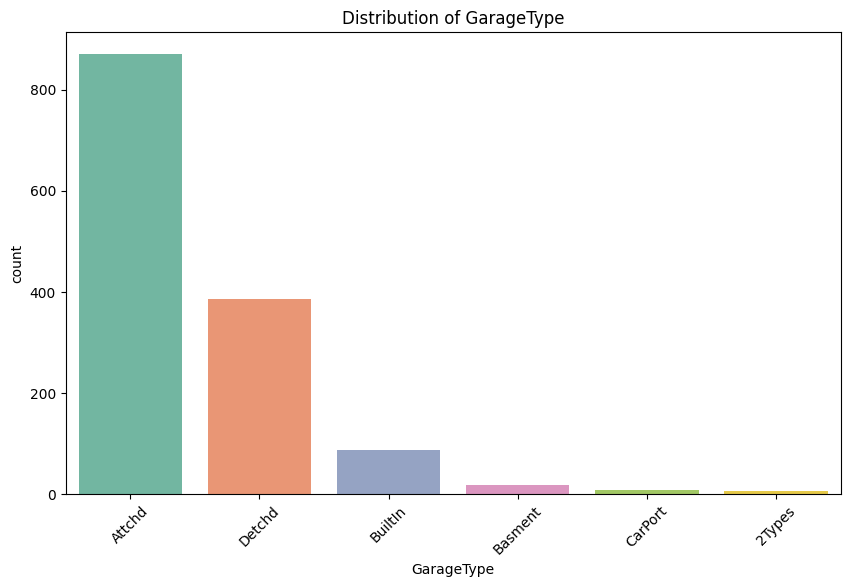

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


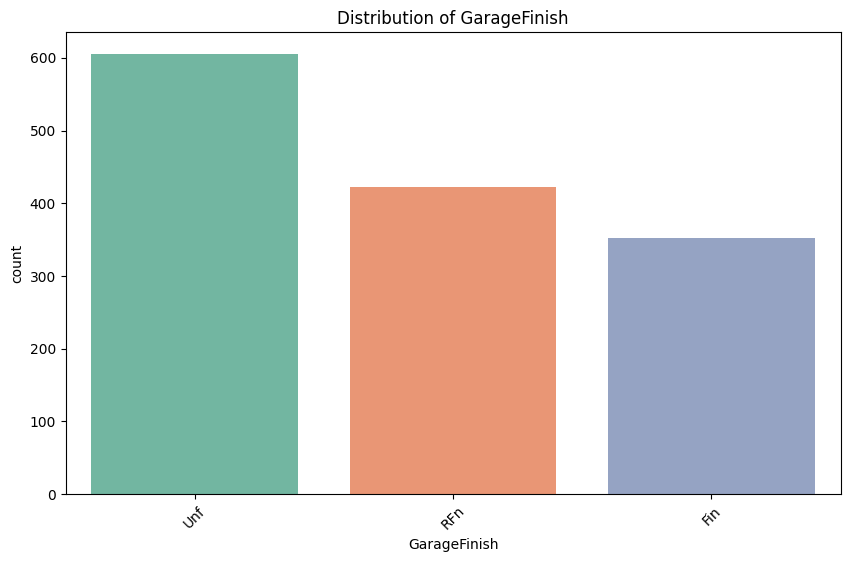

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


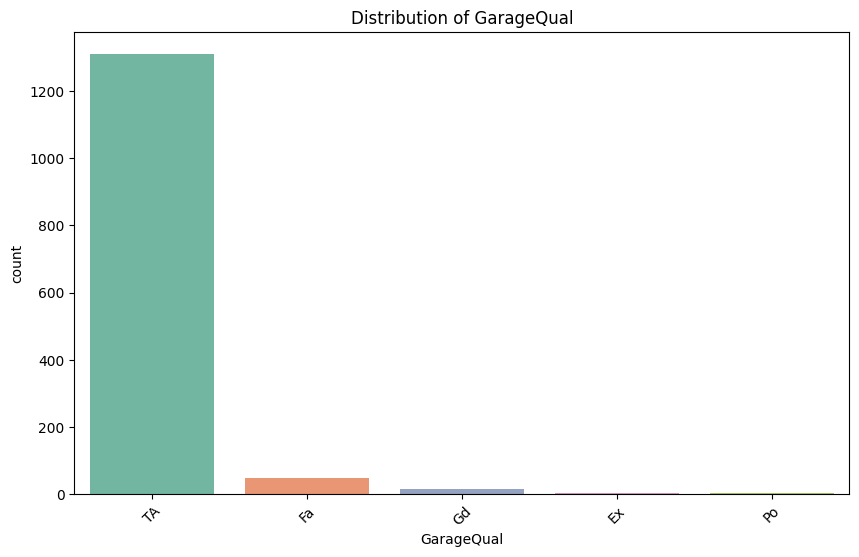

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


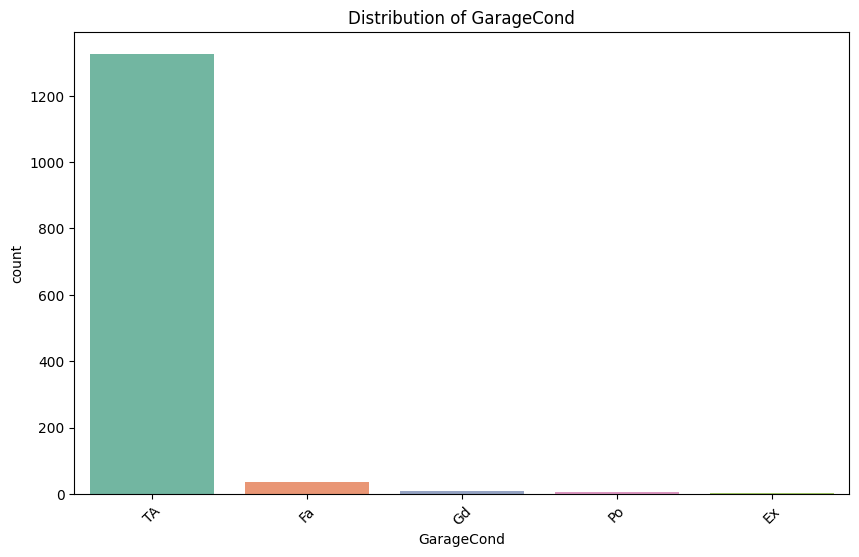

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


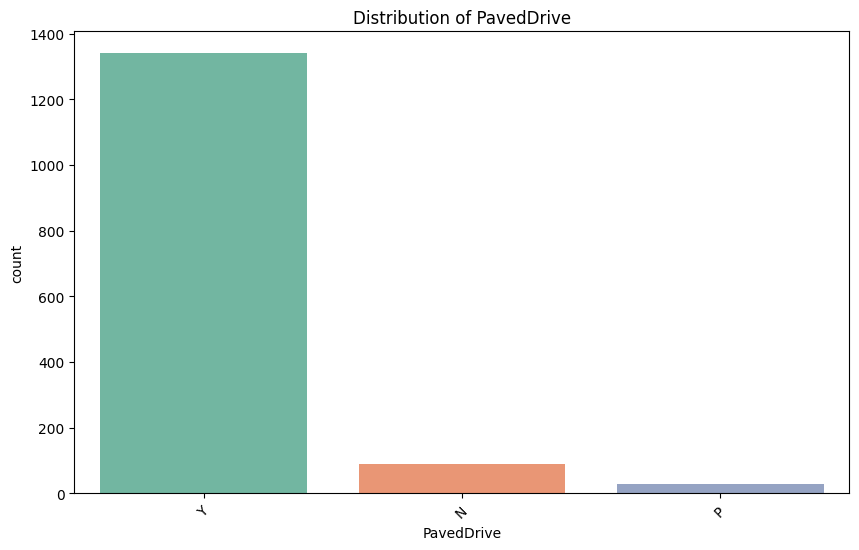

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


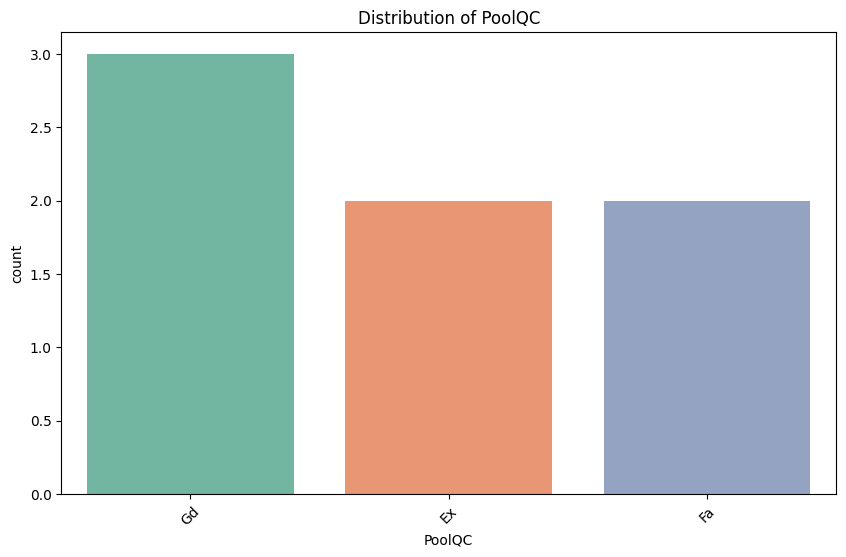

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


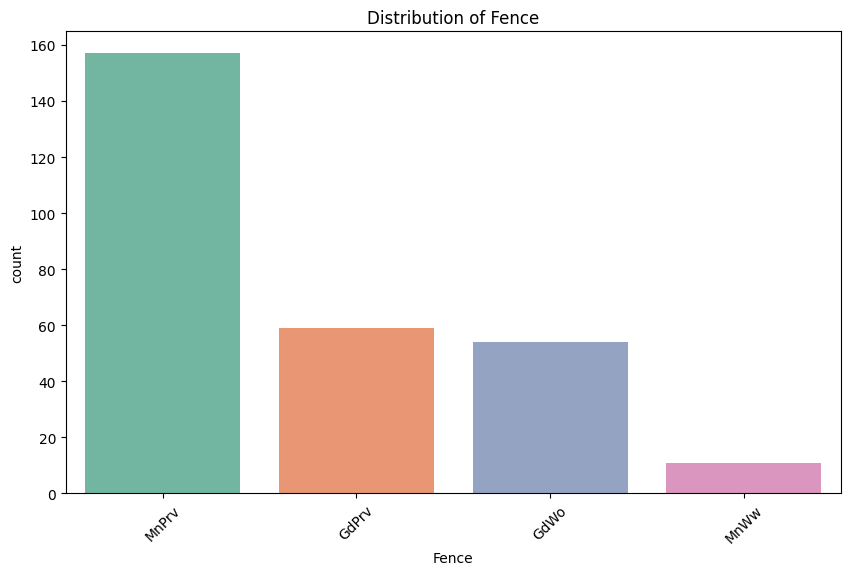

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


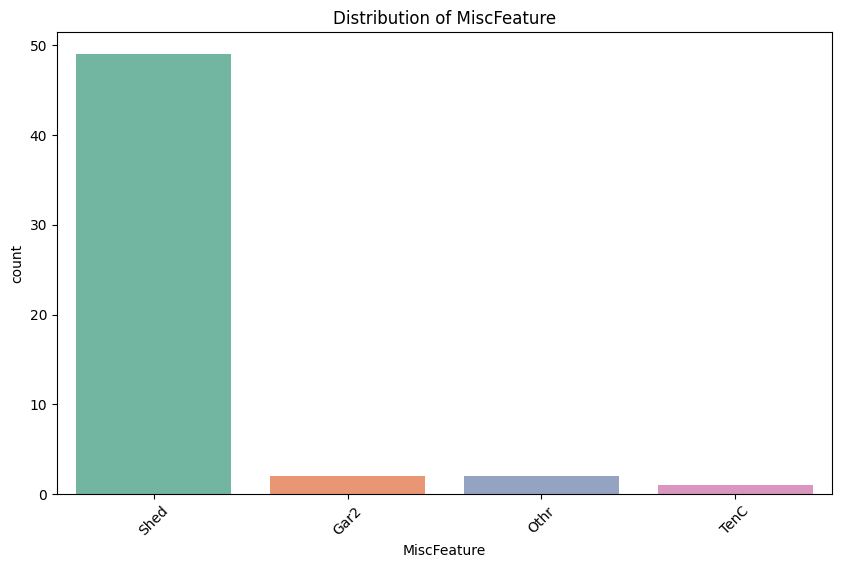

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


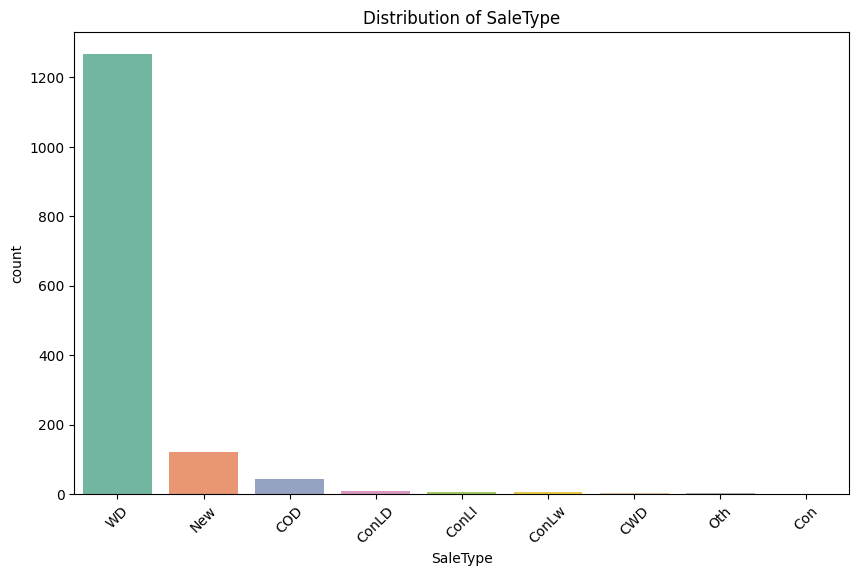

/var/folders/hf/r7nc2r613218f_z6flzjpd8h0000gn/T/ipykernel_1981/3857269125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)


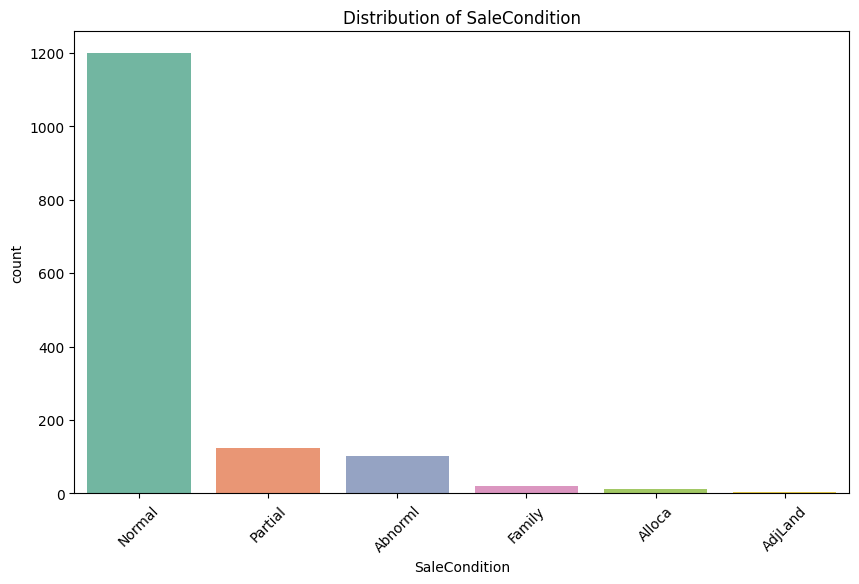

In [11]:
# Visualize value counts for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


### Observe Distributions in Numerical Variables

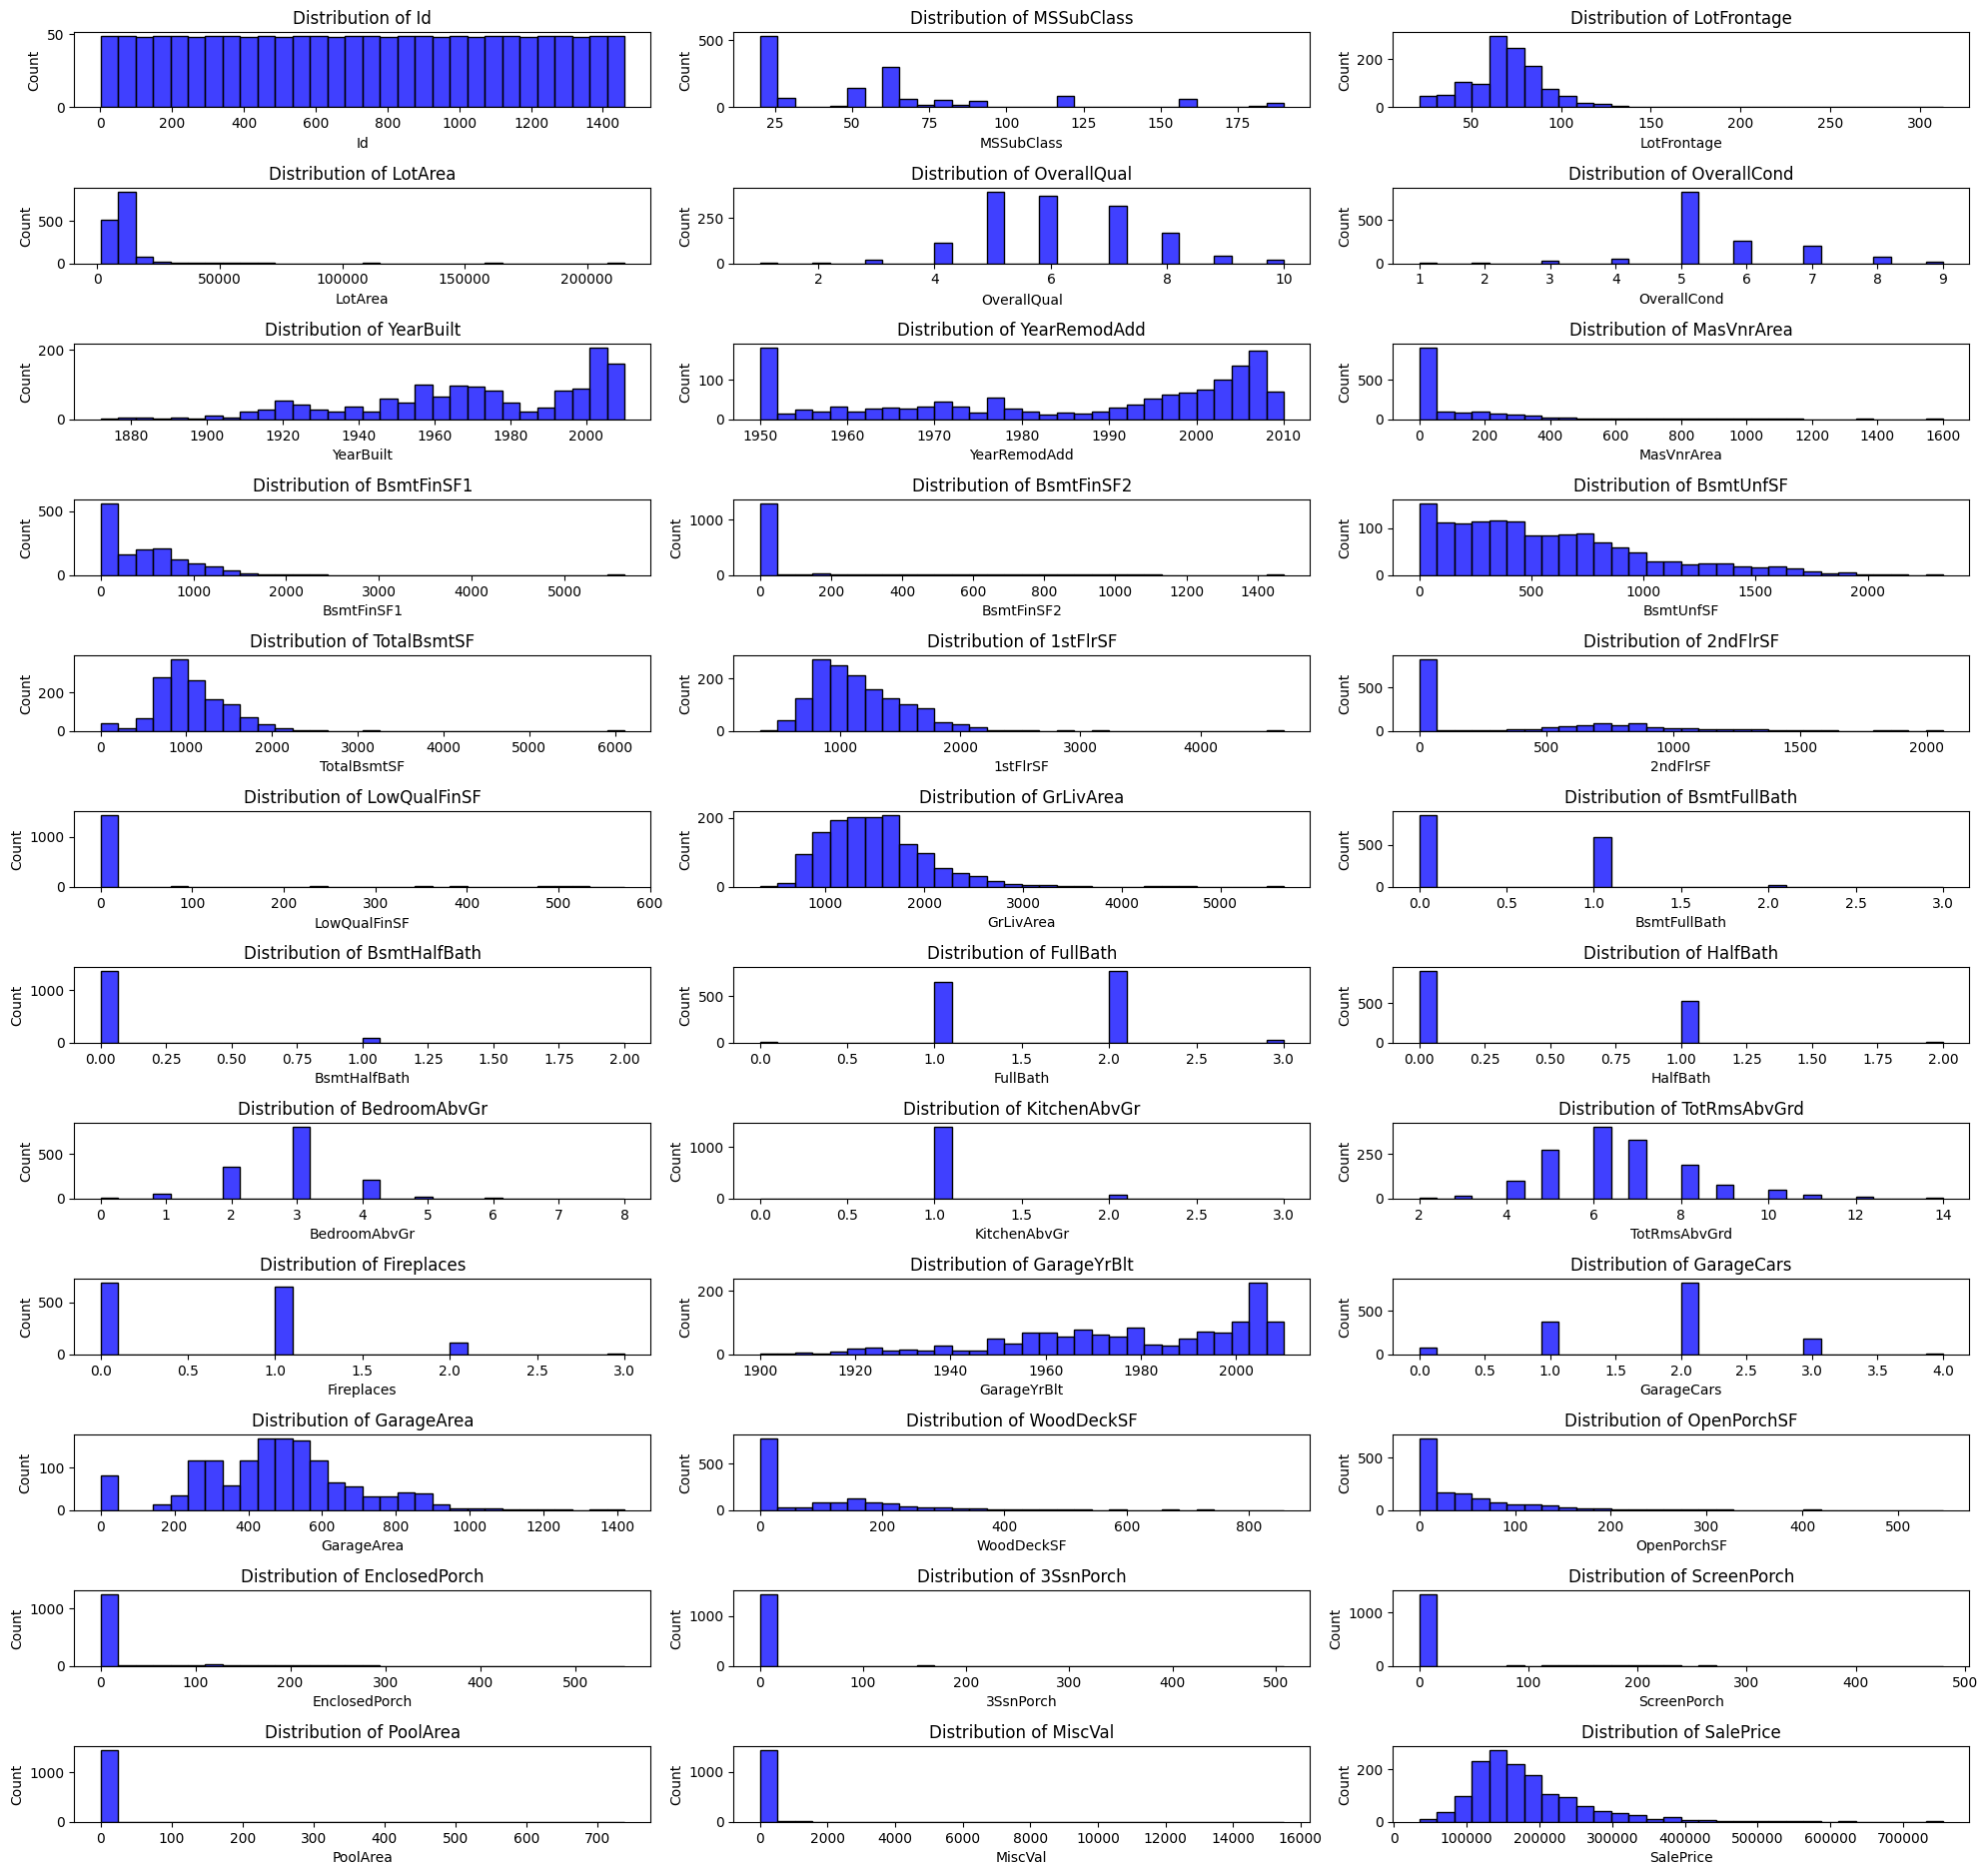

In [12]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set up the size of the plot grid
plt.figure(figsize=(20, 20))

# For loop to create histograms for each numerical column
for i, col in enumerate(numerical_cols, 1):  # enumerate for easy plotting
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)  # Adjusts grid size dynamically
    sns.histplot(df[col].dropna(), kde=False, bins=30, color="blue")  # Histogram without KDE
    plt.title(f'Distribution of {col}')
    plt.tight_layout()  # Avoid overlapping of subplots

# Display all histograms
plt.show()


In [13]:
### Check for Missing Values
df.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

### Identify Missing Data

In [14]:
# Check if missing data
missing_data = df.isnull().sum().sort_values(ascending=False)

# Calculate percentage of missing data
missing_percentage = (df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

# Combine into a DataFrame for easy viewing
missing_summary = pd.DataFrame({'Total Missing': missing_data, 'Percentage': missing_percentage})

# Display the top features with missing values
missing_summary[missing_summary['Total Missing'] > 0]


,Total Missing,Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


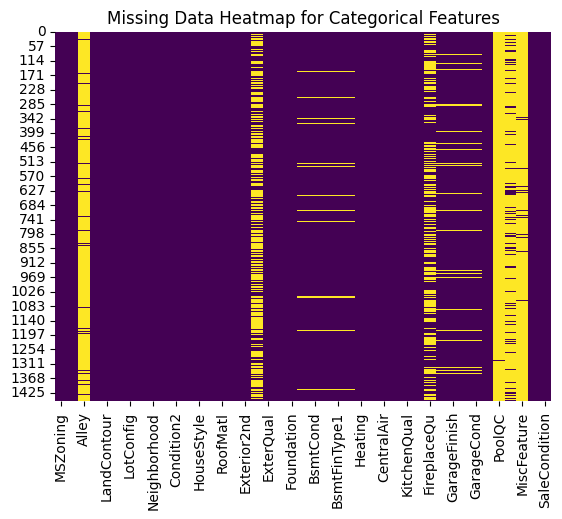

In [15]:
# Visual representation of missing data for easier viewing
sns.heatmap(df[categorical_cols].isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap for Categorical Features")
plt.show()


In [16]:
# Check for Missing Data in Numerical Columns

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Check how many numerical columns have missing data
missing_numerical = df[numerical_cols].isnull().sum()
missing_numerical = missing_numerical[missing_numerical > 0].sort_values(ascending=False)

# Display the result
print(f"Numerical columns with missing data:\n{missing_numerical}\n")
print(f"Number of numerical columns with missing data: {len(missing_numerical)}")


Numerical columns with missing data:
LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

Number of numerical columns with missing data: 3


In [17]:
# Check for Missing data in categorical columns

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Check how many categorical columns have missing data
missing_categorical = df[categorical_cols].isnull().sum()
missing_categorical = missing_categorical[missing_categorical > 0].sort_values(ascending=False)

# Display the result
print(f"Categorical columns with missing data:\n{missing_categorical}\n")
print(f"Number of categorical columns with missing data: {len(missing_categorical)}")


Categorical columns with missing data:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
Electrical         1
dtype: int64

Number of categorical columns with missing data: 16


### Handle Missing Data

#### Numerical Variables

In [18]:
# LotFrontage - Impute with Median Value

df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [19]:
# GarageYrBlt

df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

In [20]:
# MasVnrArea

df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [21]:
# List of basement-related columns with missing values
basement_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']

# Fill missing values with 0 for basement-related columns
for col in basement_cols:
    df[col] = df[col].fillna(0)

# Check if missing values are filled correctly
df[basement_cols].isnull().sum()

BsmtFinSF1     0
BsmtFinSF2     0
BsmtUnfSF      0
TotalBsmtSF    0
dtype: int64

#### Categorical Variables

In [22]:
# Impute these variables with a new category
df['Fence'] = df['Fence'].fillna('NoFence')
df['FireplaceQu'] = df['FireplaceQu'].fillna('NoFireplace')
df['GarageType'] = df['GarageType'].fillna('NoGarage')

In [23]:
# Impute MSZoning, Electrical, KitchenQual with mode (most frequent) value

impute_with_mode = ['MSZoning', 'Electrical', 'KitchenQual']

for col in impute_with_mode:
    df[col] = df[col].fillna(df[col].mode()[0])

In [24]:
df.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
MasVnrType        872
GarageFinish       81
GarageQual         81
GarageCond         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
BedroomAbvGr        0
HalfBath            0
KitchenAbvGr        0
FullBath            0
KitchenQual         0
BsmtHalfBath        0
BsmtFullBath        0
GrLivArea           0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu         0
Id                  0
GarageType          0
ScreenPorch         0
SaleCondition       0
SaleType            0
YrSold              0
MoSold              0
MiscVal             0
Fence               0
PoolArea            0
3SsnPorch           0
GarageYrBlt         0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
GarageArea          0
GarageCars          0
2ndFlrSF            0
LowQualFinSF        0
HeatingQC           0
1stFlrSF  

In [25]:
# Imputing missing values with specific categories for each column
df['PoolQC'] = df['PoolQC'].fillna('NoPool')
df['MiscFeature'] = df['MiscFeature'].fillna('NoFeature')
df['Alley'] = df['Alley'].fillna('NoAlley')
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['GarageFinish'] = df['GarageFinish'].fillna('NoGarage')

# Check if missing values are filled
df[['PoolQC', 'MiscFeature', 'Alley', 'MasVnrType', 'GarageFinish']].isnull().sum()


PoolQC          0
MiscFeature     0
Alley           0
MasVnrType      0
GarageFinish    0
dtype: int64

In [26]:
df.isna().sum().sort_values(ascending=False)

GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtCond         37
BsmtFinType1     37
BsmtQual         37
Fireplaces        0
Functional        0
TotRmsAbvGrd      0
KitchenQual       0
KitchenAbvGr      0
Id                0
GarageType        0
BedroomAbvGr      0
HalfBath          0
FullBath          0
BsmtHalfBath      0
BsmtFullBath      0
GrLivArea         0
LowQualFinSF      0
FireplaceQu       0
GarageFinish      0
GarageYrBlt       0
1stFlrSF          0
SaleCondition     0
SaleType          0
YrSold            0
MoSold            0
MiscVal           0
MiscFeature       0
Fence             0
PoolQC            0
PoolArea          0
ScreenPorch       0
3SsnPorch         0
EnclosedPorch     0
OpenPorchSF       0
WoodDeckSF        0
PavedDrive        0
GarageArea        0
GarageCars        0
2ndFlrSF          0
HeatingQC         0
Electrical        0
OverallCond       0
HouseStyle        0
BldgType          0
Condition2        0
Condition1        0


In [27]:
# Handling GarageQual, GarageCond, BsmtExposture, BsmtFinType1, BsmtFinType2, BsmtCond, BsmtQual
df['GarageQual'] = df['GarageQual'].fillna('NoGarage')
df['GarageCond'] = df['GarageCond'].fillna('NoGarage')
df['BsmtExposure'] = df['BsmtExposure'].fillna('NoBsmt')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NoBsmt')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NoBsmt')
df['BsmtCond'] = df['BsmtCond'].fillna('NoBsmt')
df['BsmtQual'] = df['BsmtQual'].fillna('NoBsmt')


In [28]:
# Check if all missing values are filled
missing_data = df.isnull().sum()
missing_data[missing_data > 0]


Series([], dtype: int64)

### Identify Outliers

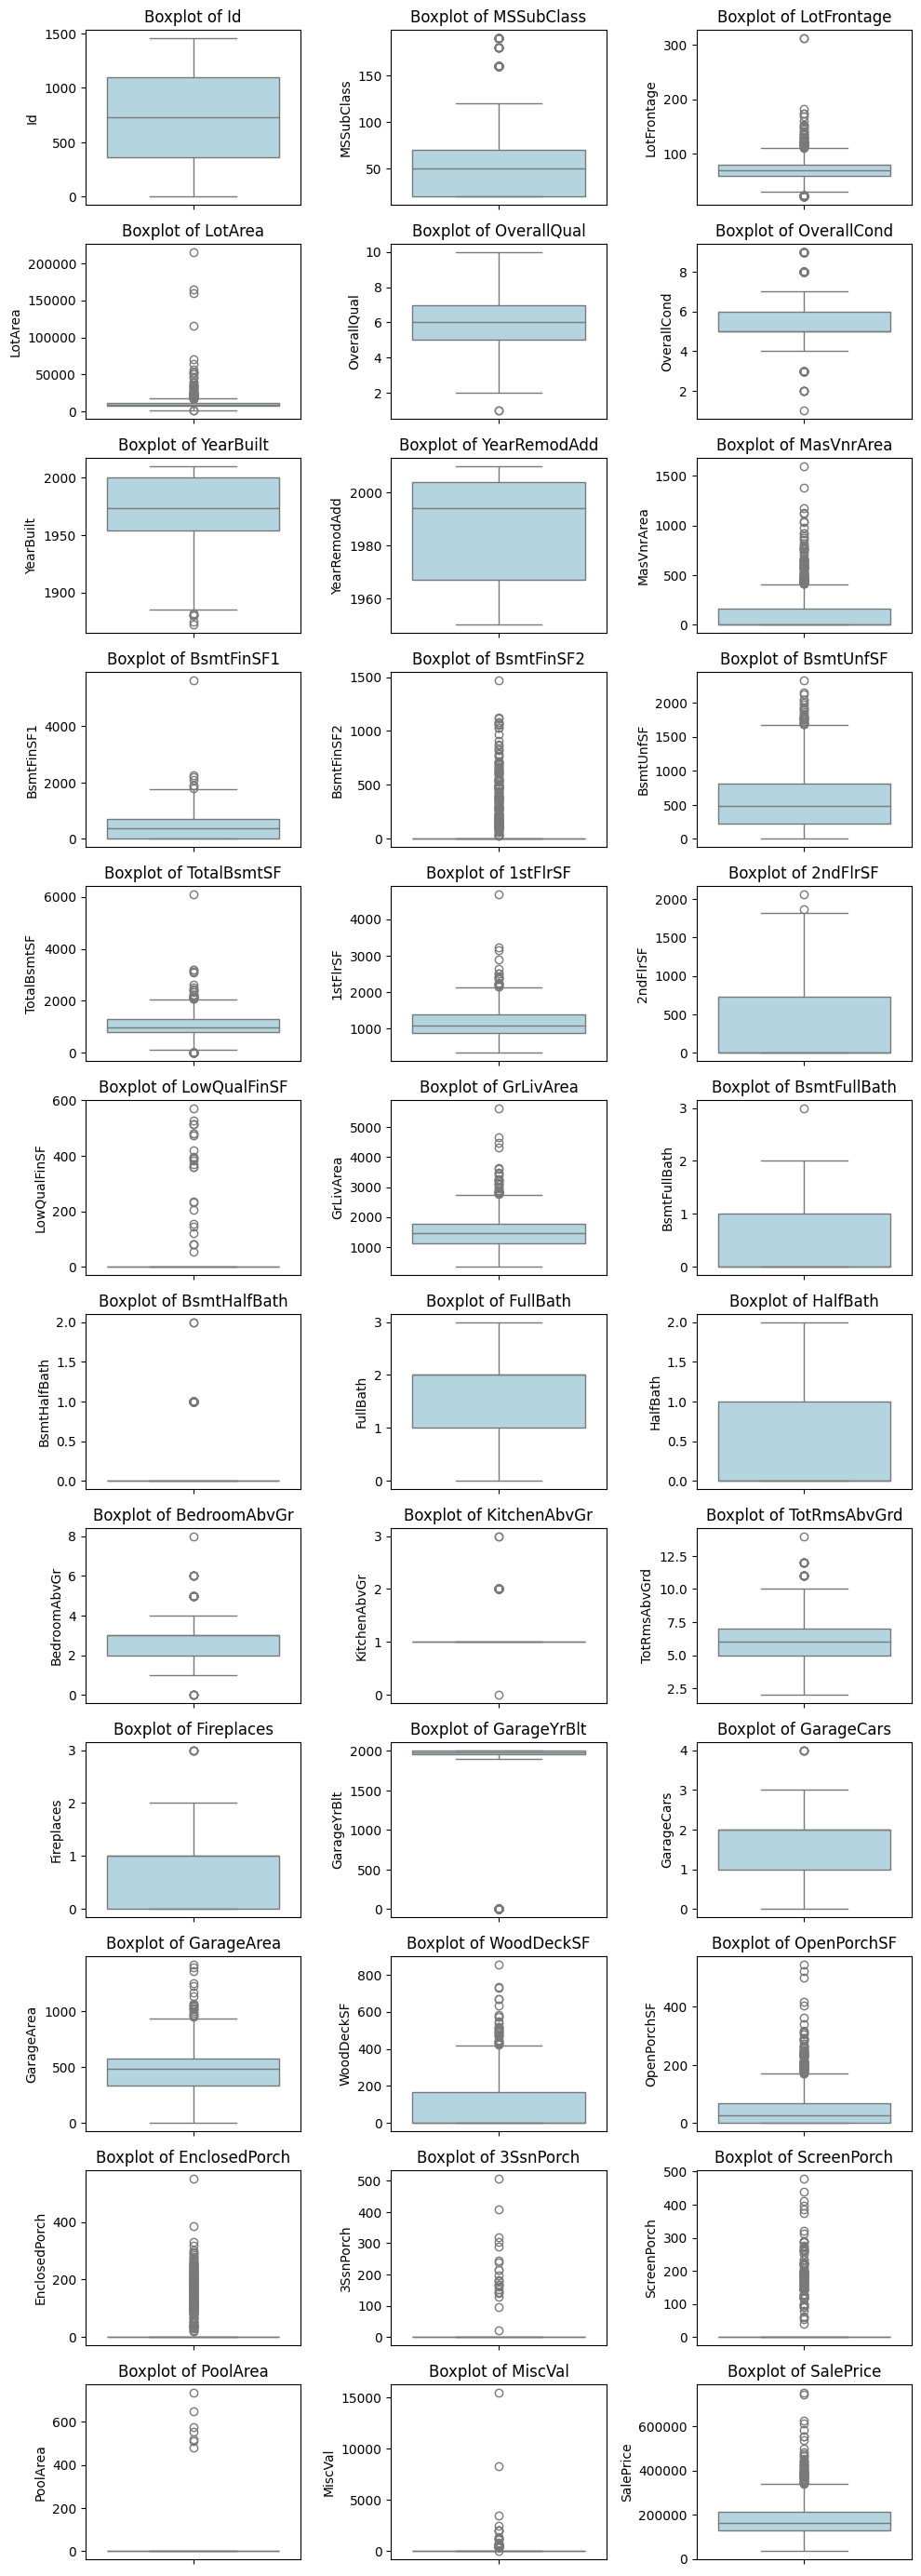

In [29]:
# Using boxplots to visualize outliers for each numerical column
plt.figure(figsize=(10, 30))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.boxplot(data=df[col].dropna(), color="lightblue")
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [30]:
# Identify Outliers using IQR

def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    return outliers

# Apply the function to each numerical column and check for outliers
for col in numerical_cols:
    outliers = detect_outliers(df, col)
    print(f"Outliers in {col}: {len(outliers)}")


Outliers in Id: 0
Outliers in MSSubClass: 103
Outliers in LotFrontage: 93
Outliers in LotArea: 69
Outliers in OverallQual: 2
Outliers in OverallCond: 125
Outliers in YearBuilt: 7
Outliers in YearRemodAdd: 0
Outliers in MasVnrArea: 98
Outliers in BsmtFinSF1: 7
Outliers in BsmtFinSF2: 167
Outliers in BsmtUnfSF: 29
Outliers in TotalBsmtSF: 61
Outliers in 1stFlrSF: 20
Outliers in 2ndFlrSF: 2
Outliers in LowQualFinSF: 26
Outliers in GrLivArea: 31
Outliers in BsmtFullBath: 1
Outliers in BsmtHalfBath: 82
Outliers in FullBath: 0
Outliers in HalfBath: 0
Outliers in BedroomAbvGr: 35
Outliers in KitchenAbvGr: 68
Outliers in TotRmsAbvGrd: 30
Outliers in Fireplaces: 5
Outliers in GarageYrBlt: 81
Outliers in GarageCars: 5
Outliers in GarageArea: 21
Outliers in WoodDeckSF: 32
Outliers in OpenPorchSF: 77
Outliers in EnclosedPorch: 208
Outliers in 3SsnPorch: 24
Outliers in ScreenPorch: 116
Outliers in PoolArea: 7
Outliers in MiscVal: 52
Outliers in SalePrice: 61


#### Special look at outliers in target variable

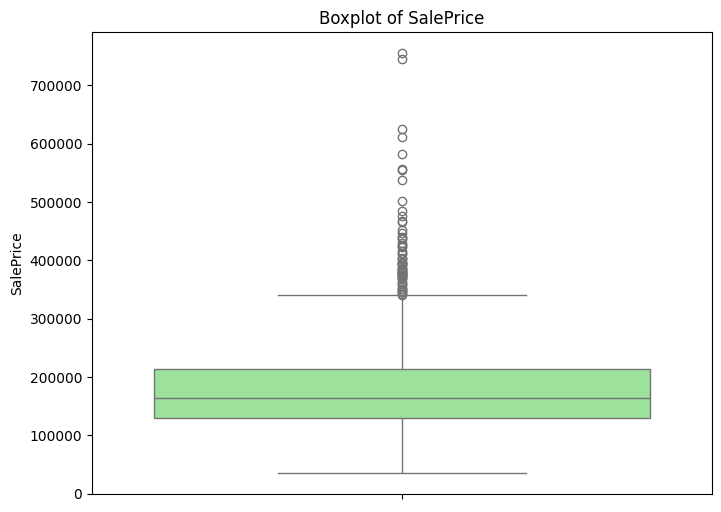

Number of outliers in SalePrice: 61


In [31]:
# Boxplot for SalePrice
plt.figure(figsize=(8, 6))
sns.boxplot(df['SalePrice'], color="lightgreen")
plt.title('Boxplot of SalePrice')
plt.show()

# Detect outliers in SalePrice
saleprice_outliers = detect_outliers(df, 'SalePrice')
print(f"Number of outliers in SalePrice: {len(saleprice_outliers)}")


### Handle Outliers

In [32]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    df[col] = np.where(df[col] > upper_bound, upper_bound, np.where(df[col] < lower_bound, lower_bound, df[col]))

# Apply the capping function to all numerical columns
for col in numerical_cols:
    cap_outliers(df, col)

# Verify that outliers have been capped
df[numerical_cols].describe().round(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0,1460.00,1460.00,1460.00,1460.00,1460.0,1460.00,1460.00,1460.0,1460.00,1460.00,1460.00,1460.0,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.00
mean,730.50,55.09,69.49,9647.39,6.10,5.54,1971.30,1984.87,89.41,440.00,0.0,563.78,1050.25,1157.02,346.79,0.0,1503.74,0.42,0.0,1.57,0.38,2.85,1.0,6.49,0.61,1973.79,1.77,470.67,91.81,42.6,0.0,0.0,0.0,0.0,0.0,177331.53
std,421.61,37.51,18.02,3594.36,1.38,0.96,30.11,20.65,134.02,433.22,0.0,431.71,397.94,362.58,435.79,0.0,481.38,0.52,0.0,0.55,0.50,0.76,0.0,1.54,0.64,30.90,0.74,207.11,116.66,52.5,0.0,0.0,0.0,0.0,0.0,67205.84
min,1.00,20.00,30.00,1481.50,2.00,3.50,1885.00,1950.00,0.00,0.00,0.0,0.00,42.00,334.00,0.00,0.0,334.00,0.00,0.0,0.00,0.00,0.50,1.0,2.00,0.00,1893.50,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,34900.00
25%,365.75,20.00,60.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.0,223.00,795.75,882.00,0.00,0.0,1129.50,0.00,0.0,1.00,0.00,2.00,1.0,5.00,0.00,1958.00,1.00,334.50,0.00,0.0,0.0,0.0,0.0,0.0,0.0,129975.00
50%,730.50,50.00,70.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.0,477.50,991.50,1087.00,0.00,0.0,1464.00,0.00,0.0,2.00,0.00,3.00,1.0,6.00,1.00,1977.00,2.00,480.00,0.00,25.0,0.0,0.0,0.0,0.0,0.0,163000.00
75%,1095.25,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,164.25,712.25,0.0,808.00,1298.25,1391.25,728.00,0.0,1776.75,1.00,0.0,2.00,1.00,3.00,1.0,7.00,1.00,2001.00,2.00,576.00,168.00,68.0,0.0,0.0,0.0,0.0,0.0,214000.00
max,1460.00,145.00,110.00,17673.50,10.00,7.50,2010.00,2010.00,410.62,1780.62,0.0,1685.50,2052.00,2155.12,1820.00,0.0,2747.62,2.50,0.0,3.00,2.00,4.50,1.0,10.00,2.50,2010.00,3.50,938.25,420.00,170.0,0.0,0.0,0.0,0.0,0.0,340037.50


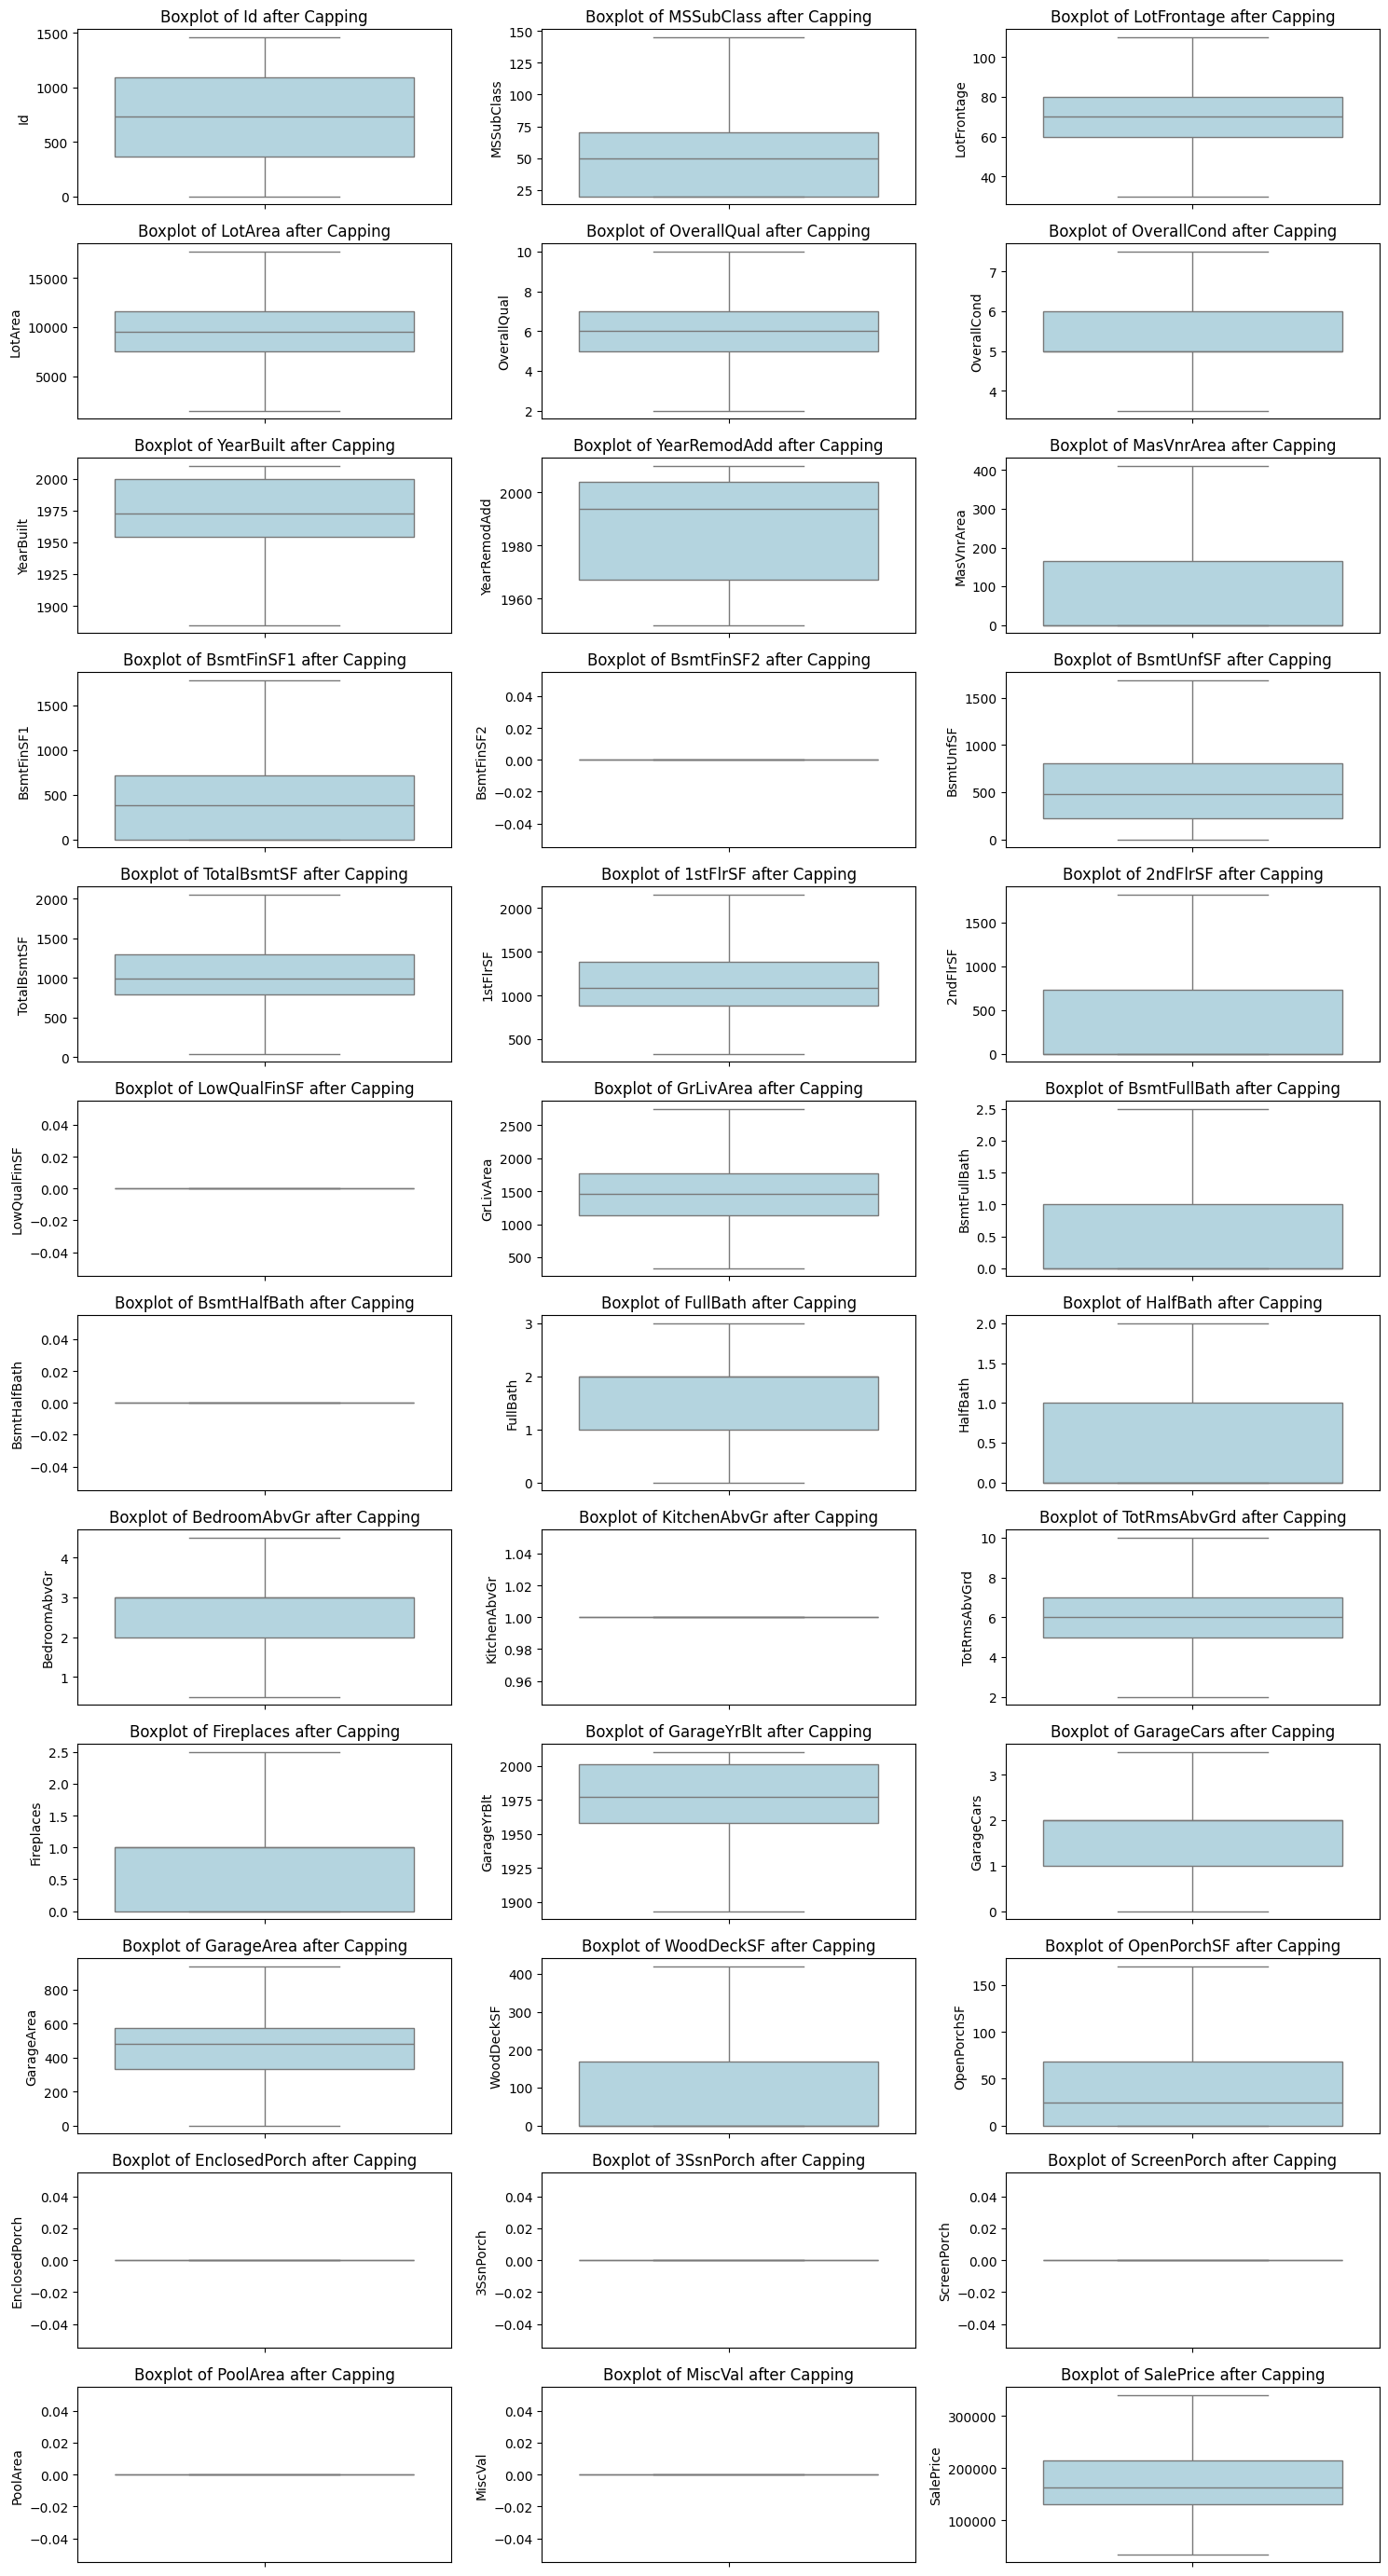

In [33]:
# Plot boxplots to visualize capped outliers
plt.figure(figsize=(15, 30))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.boxplot(data=df[col], color="lightblue")
    plt.title(f'Boxplot of {col} after Capping')
    plt.tight_layout()

plt.show()


### Correlation Analysis

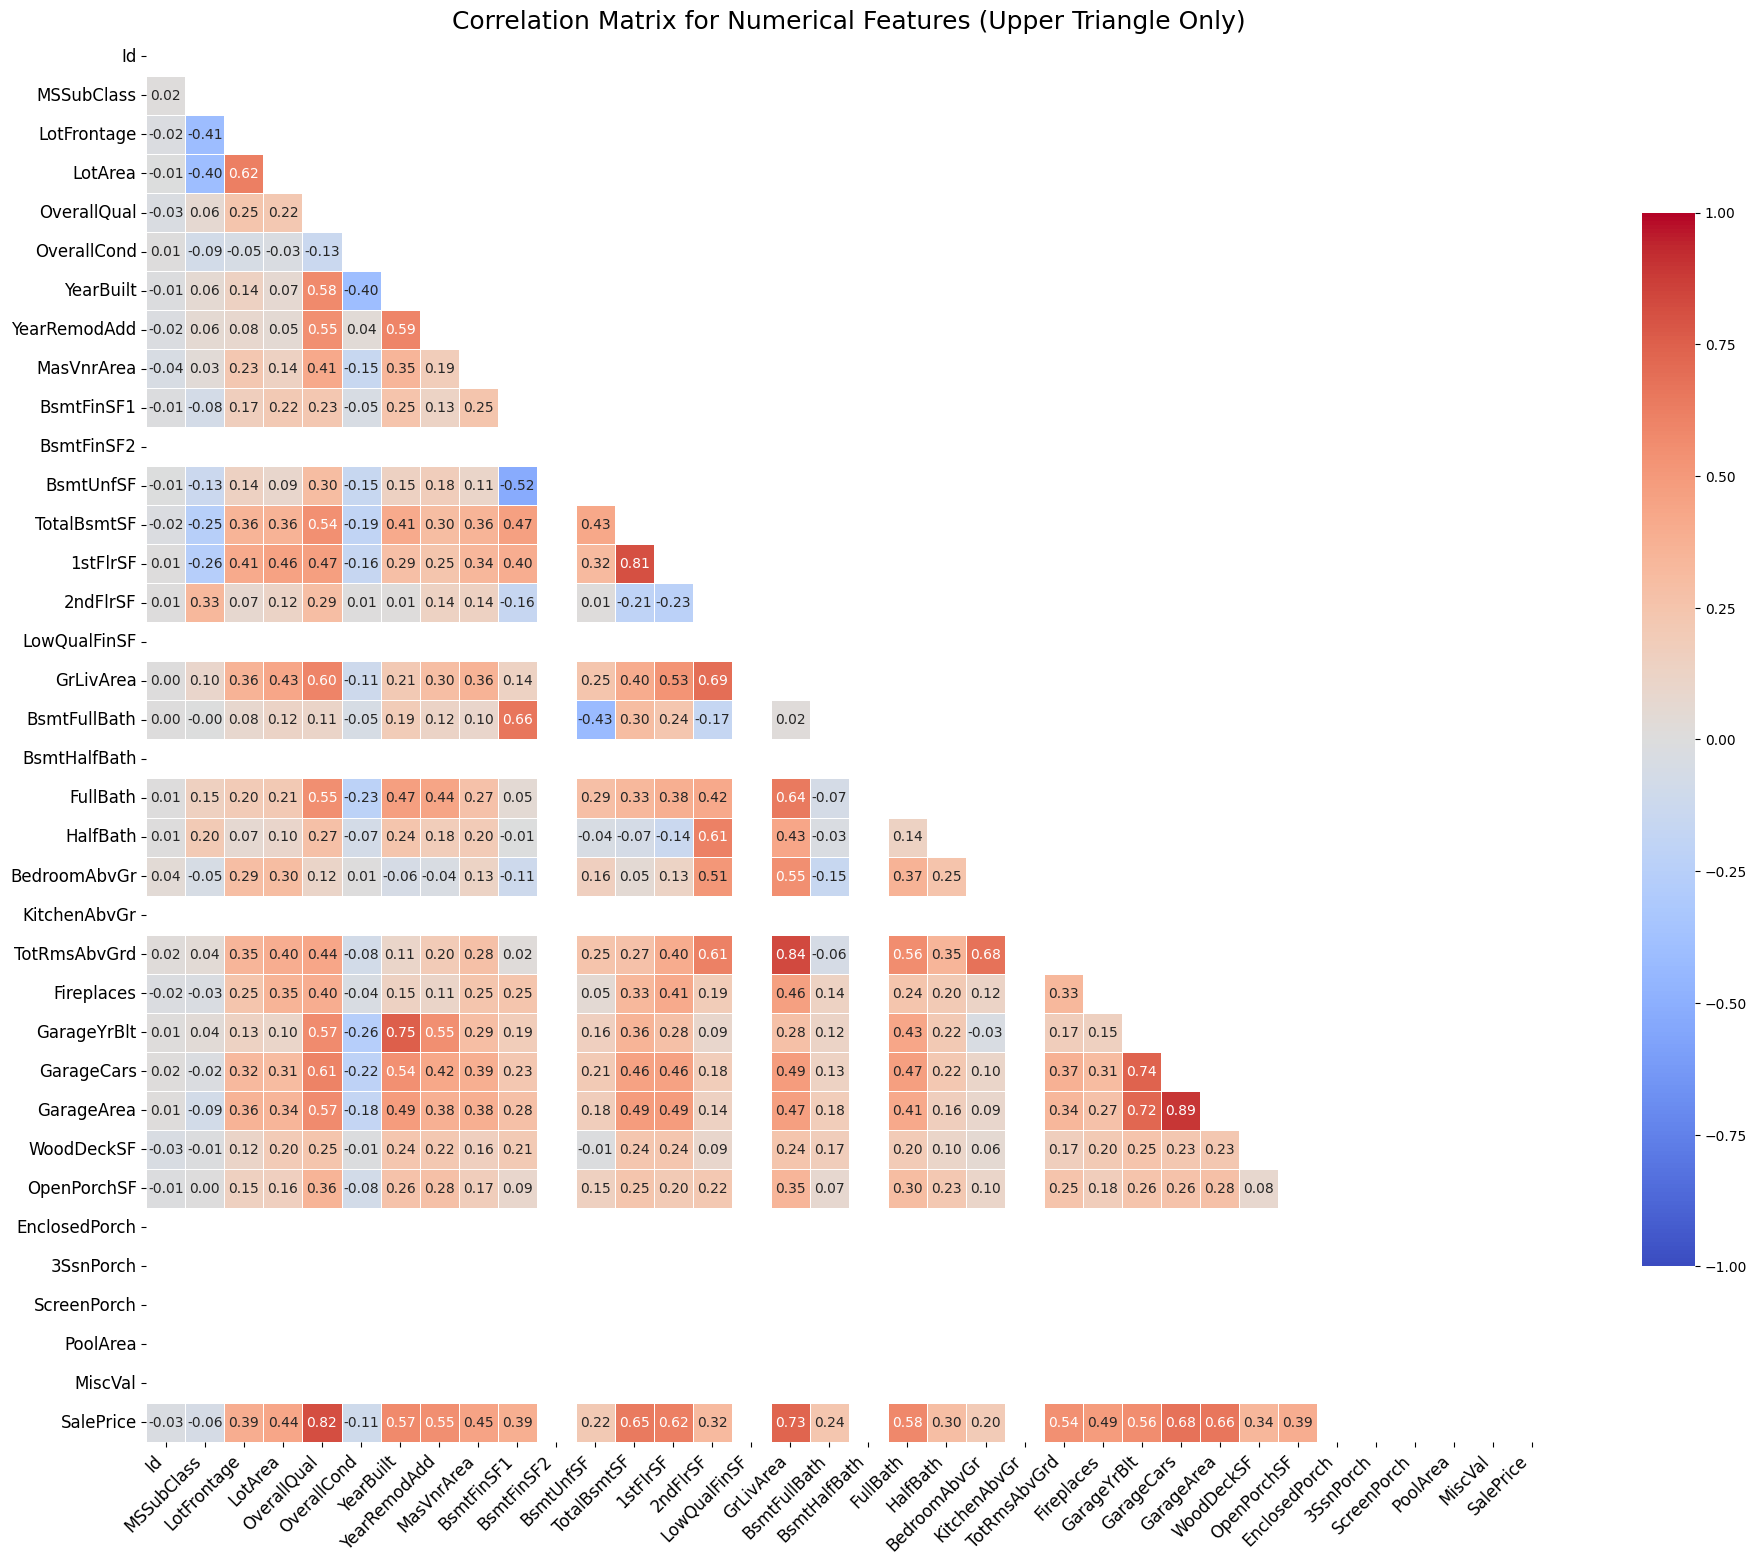

In [34]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix for numerical columns
corr_matrix = numerical_cols.corr()

# Generate a mask for the upper triangle (half-matrix)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure with a larger size
plt.figure(figsize=(20, 16))

# Create a heatmap with better formatting for readability
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1,
            cbar_kws={"shrink": 0.75}, square=True, linewidths=0.5, annot_kws={"size": 10})

# Adjust the title and axis labels for better readability
plt.title("Correlation Matrix for Numerical Features (Upper Triangle Only)", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add some space between the plot and text
plt.tight_layout(pad=2.0)
plt.show()


In [35]:
# Identifying Strong Associations

# Set correlation threshold (e.g., |correlation| > 0.7)
threshold = 0.7

# Get the correlation matrix for numerical columns
corr_matrix = numerical_cols.corr()

# Mask the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Filter correlations greater than the threshold (positive or negative)
strong_corr = corr_matrix[abs(corr_matrix) > threshold].stack().reset_index()

# Rename columns for readability
strong_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Drop duplicate pairs (i.e., Feature A vs Feature B and Feature B vs Feature A)
strong_corr = strong_corr[strong_corr['Feature 1'] != strong_corr['Feature 2']].drop_duplicates()

# Sort by the absolute value of correlation for easier viewing
strong_corr = strong_corr.sort_values(by='Correlation', ascending=False)

# Display the strong correlations
print("Features with Strong Correlations (|correlation| > 0.7):")
print(strong_corr)


Features with Strong Correlations (|correlation| > 0.7):
       Feature 1     Feature 2  Correlation
34    GarageCars    GarageArea     0.894560
36    GarageArea    GarageCars     0.894560
19     GrLivArea  TotRmsAbvGrd     0.835192
25  TotRmsAbvGrd     GrLivArea     0.835192
5    OverallQual     SalePrice     0.817680
40     SalePrice   OverallQual     0.817680
14   TotalBsmtSF      1stFlrSF     0.807158
15      1stFlrSF   TotalBsmtSF     0.807158
8      YearBuilt   GarageYrBlt     0.752361
28   GarageYrBlt     YearBuilt     0.752361
30   GarageYrBlt    GarageCars     0.740486
32    GarageCars   GarageYrBlt     0.740486
20     GrLivArea     SalePrice     0.729311
41     SalePrice     GrLivArea     0.729311
31   GarageYrBlt    GarageArea     0.721376
35    GarageArea   GarageYrBlt     0.721376


### Analyse Bivariate Relationships (Numerical Features and SalePrice)

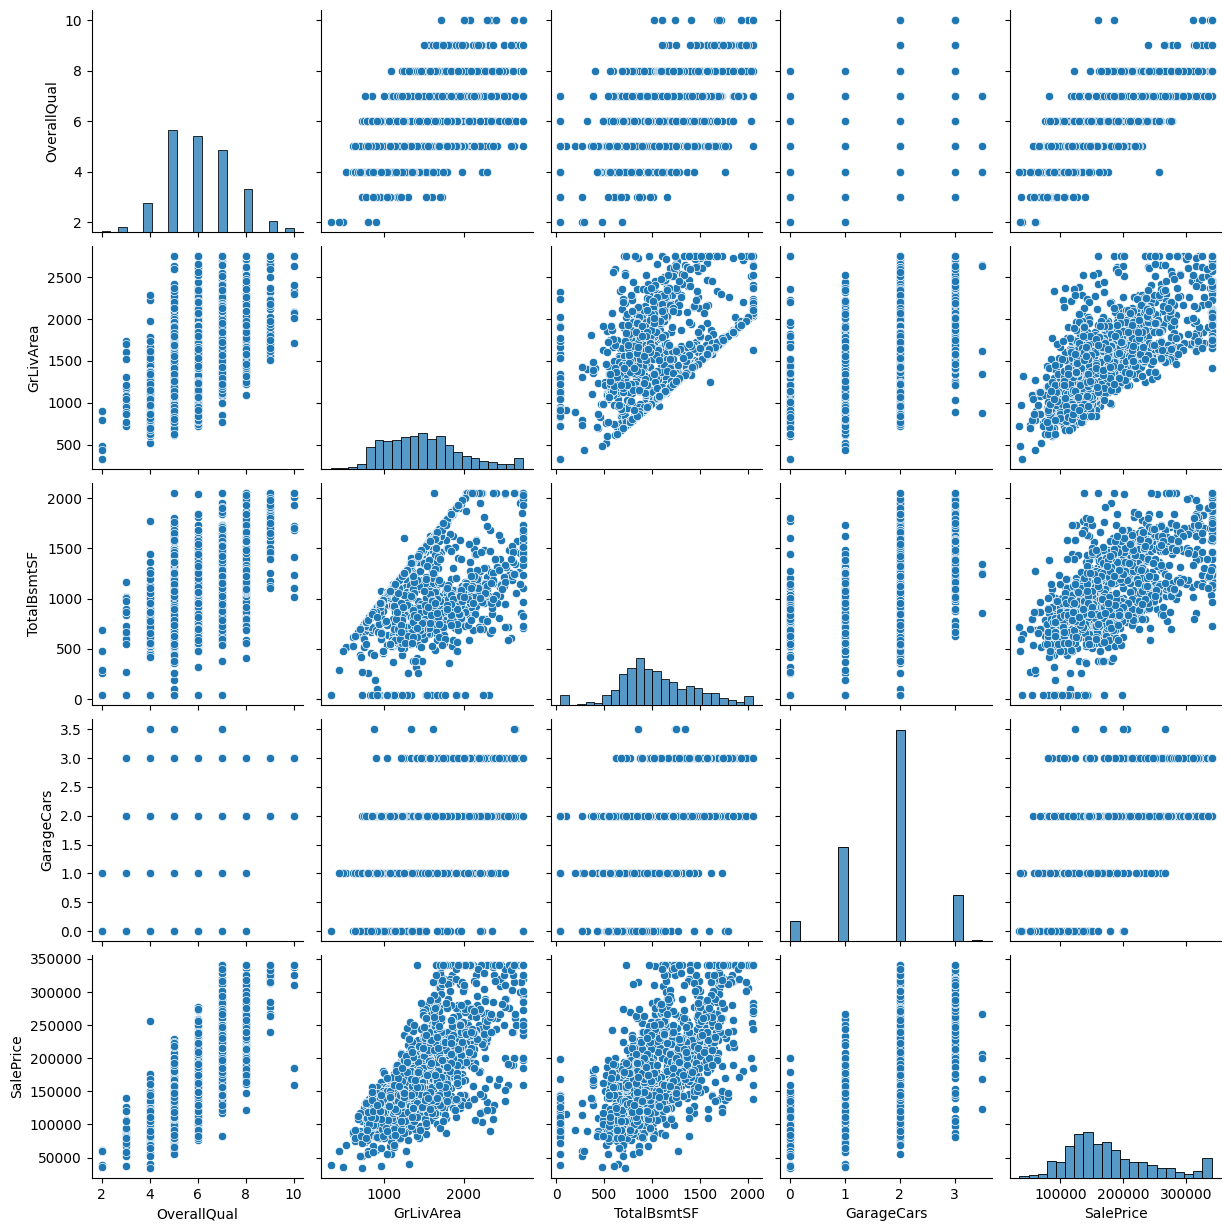

In [36]:
# Select key features for pair plots
key_features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'SalePrice']

# Create pair plots for selected features
sns.pairplot(df[key_features])
plt.show()


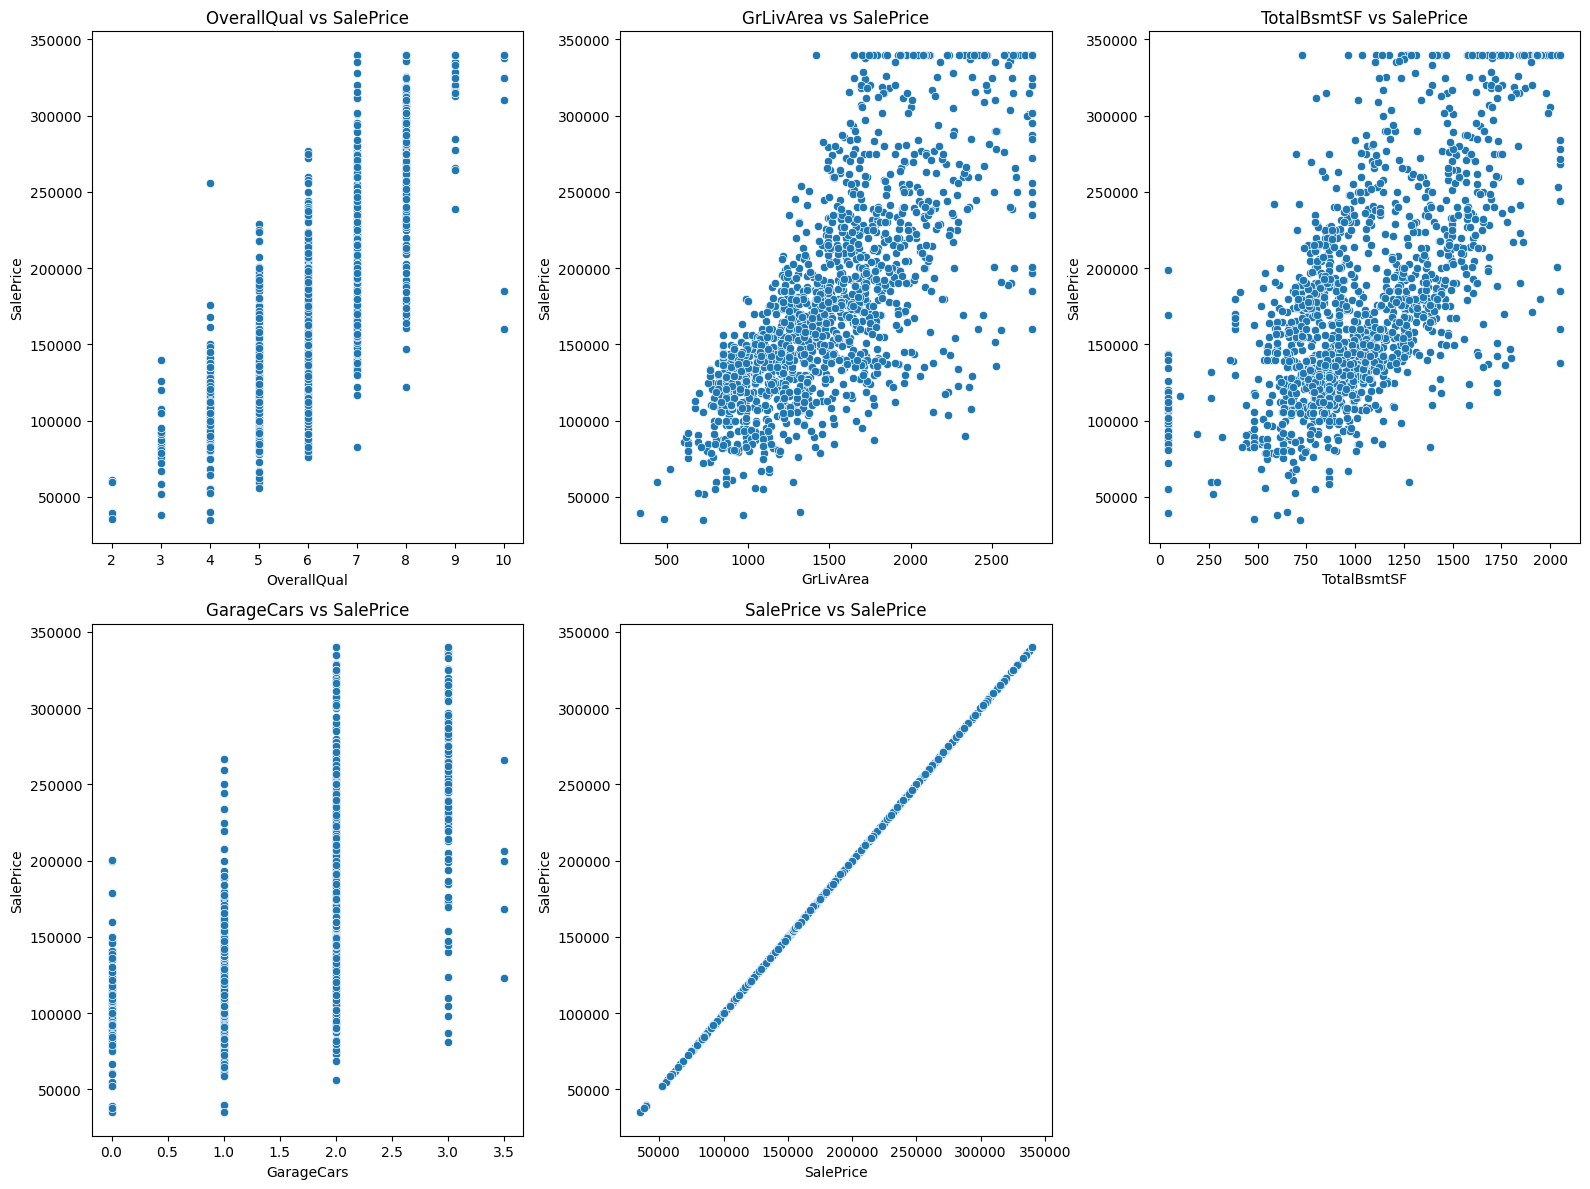

In [37]:
# Scatter plots of numerical features vs SalePrice
plt.figure(figsize=(16, 12))

for i, col in enumerate(key_features, 1):
    plt.subplot(len(key_features) // 3 + 1, 3, i)
    sns.scatterplot(x=col, y='SalePrice', data=df)
    plt.title(f'{col} vs SalePrice')
    plt.tight_layout()

plt.show()


## Feature Engineering

### Handle Highly Correlated Features

1. GarageCars and GarageArea (Correlation = 0.89):

   - Keep GarageArea, drop GarageCars.
  
2. GrLivArea and TotRmsAbvGrd (Correlation = 0.83):

   - Keep GrLivArea, drop TotRmsAbvGrd.

3. TotalBsmtSF and 1stFlrSF (Correlation = 0.81):

   - Keep TotalBsmtSF, drop 1stFlrSF.

In [38]:
print(df.columns)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Generate New Features

In [39]:
# Initialize Woodwork with a name and set the index
df.ww.init(name="houses")

# Ensure the 'Id' column is set as the index
df.ww.set_index("Id")

# Check if Woodwork is properly initialized and if the index is set
print("Woodwork initialized, and index set:")
print(df.ww.index)


/Users/drjodyannjones/Documents/CLIENTS/DELPHINA/Kaggle_House_Prices/venv/lib/python3.9/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/Users/drjodyannjones/Documents/CLIENTS/DELPHINA/Kaggle_House_Prices/venv/lib/python3.9/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/Users/drjodyannjones/Documents/CLIENTS/DELPHINA/Kaggle_House_Prices/venv/lib/python3.9/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datet

Woodwork initialized, and index set:
Id


/Users/drjodyannjones/Documents/CLIENTS/DELPHINA/Kaggle_House_Prices/venv/lib/python3.9/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/Users/drjodyannjones/Documents/CLIENTS/DELPHINA/Kaggle_House_Prices/venv/lib/python3.9/site-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(


In [40]:
# Check for existing column names to confirm 'YrSold' and 'MoSold' are present
print(df.columns)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [41]:
df['YrSold'] = pd.to_datetime(df['YrSold'], format='%Y', errors='coerce')
df['MoSold'] = pd.to_datetime(df['MoSold'], format='%m', errors='coerce')

In [42]:
# Create an EntitySet
es = ft.EntitySet(id="house_prices")

# Add the dataframe to the EntitySet
es = es.add_dataframe(dataframe_name="houses", dataframe=df, index="Id")

# Run Deep Feature Synthesis to automatically create new features
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="houses",
    agg_primitives=["mean", "sum", "mode", "std", "count"],
    trans_primitives=["month", "year", "day", "percentile", "square_root"],
    max_depth=6
)

# Add the new features to the original dataframe
df = pd.concat([df, feature_matrix], axis=1)

# Check the updated shape of the dataframe
print(f"Total number of features: {df.shape[1]}")


# Add the generated features to the original dataframe
df = pd.concat([df, feature_matrix], axis=1)

# Check the shape of the dataframe to confirm the number of new features
print(f"Total number of features: {df.shape[1]}")


/Users/drjodyannjones/Documents/CLIENTS/DELPHINA/Kaggle_House_Prices/venv/lib/python3.9/site-packages/featuretools/entityset/entityset.py:724: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index
  warnings.warn(
/Users/drjodyannjones/Documents/CLIENTS/DELPHINA/Kaggle_House_Prices/venv/lib/python3.9/site-packages/featuretools/synthesis/deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
/Users/drjodyannjones/Documents/CLIENTS/DELPHINA/Kaggle_House_Prices/venv/lib/python3.9/site-packages/featuretools/synthesis/dfs.py:321: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  agg_primitives: ['count', 'mean', 'mode', 'std', 'sum']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible columns for the primitive were found in the

Total number of features: 235
Total number of features: 389


In [46]:
df.shape

(1460, 389)